In [47]:
filename="spk_train_64_2000000_b_-2_-1_diag_weight_0.5"
with open(os.path.join("/home/tong/hidden-neuron-simulation/data", filename), "rb") as f:
    spk_train = pickle.load(f)
n_neuron = 3
cov_parallel(spk_train.spike_train, neuron_pairs=[[i, j] for j in range(n_neuron) for i in range(n_neuron)], n_processes=9)

9 covariance will be estimated for 64 neurons
1


  0%|          | 0/1 [00:00<?, ?it/s]

[[0, 0], [1, 0], [2, 0], [0, 1], [1, 1], [2, 1], [0, 2], [1, 2], [2, 2]]
correlation [0, 0] estimation with 2000000 data...
correlation [1, 0] estimation with 2000000 data...
correlation [2, 0] estimation with 2000000 data...
correlation [0, 1] estimation with 2000000 data...
correlation [1, 1] estimation with 2000000 data...
correlation [2, 1] estimation with 2000000 data...
correlation [0, 2] estimation with 2000000 data...
correlation [1, 2] estimation with 2000000 data...
correlation [2, 2] estimation with 2000000 data...
Time took for covariance estimation 61.69 s
Time took for covariance estimation 61.56 s
Time took for covariance estimation 63.78 s
Time took for covariance estimation 61.05 s
Time took for covariance estimation 62.39 s
Time took for covariance estimation 62.59 s
Time took for covariance estimation 61.85 s
Time took for covariance estimation 61.37 s
Time took for covariance estimation 66.69 s


100%|██████████| 1/1 [01:19<00:00, 79.43s/it]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from filter_inference import calculate_corr_all
import os, pickle
import matplotlib.style as style
style.use('seaborn-colorblind')

<ipython-input-1-4c5a5ab0dfc5>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-colorblind')


## Figure 1. Schematics

- neurons in a network; with spike train shown
- inferred neuron filters for 2 observed neurons; covariance

In [6]:
# raster plot of spike train
filename="spk_train_64_2000000_b_-2_-1_diag_weight_1.5"
with open(os.path.join("/home/tong/hidden-neuron-simulation/data", filename), "rb") as f:
    spk_train = pickle.load(f)


In [34]:
spk_train.N = 3

[5030, 5500]
[862, 458, 321, 501, 818, 435, 483, 461, 646, 1324, 583, 468, 812, 343, 717, 582, 1066, 1143, 1167, 1029, 469, 344, 509, 588, 706, 527, 382, 517, 412, 775, 825, 1205, 813, 593, 716, 516, 312, 916, 850, 824, 675, 674, 1197, 554, 1232, 223, 606, 803, 502, 641, 434, 1096, 577, 784, 1198, 1137, 688, 525, 1145, 578, 593, 770, 438, 1035]
[939, 516, 337, 552, 897, 480, 526, 498, 714, 1448, 635, 517, 889, 365, 793, 641, 1168, 1256, 1277, 1122, 515, 371, 549, 651, 768, 567, 424, 563, 452, 869, 892, 1325, 895, 634, 777, 565, 349, 1005, 919, 896, 739, 754, 1317, 599, 1345, 249, 676, 876, 551, 691, 476, 1203, 619, 853, 1320, 1243, 738, 570, 1257, 636, 644, 842, 484, 1125]


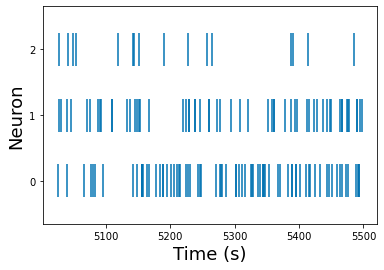

In [42]:

spk_train.plot_raster(t_window=[5030,5500], savefig=True)

In [276]:
from filter_inference import infer_J_ij
obs = 3
dp=1
inferred_no_basis_3_3 = []
inferred_with_basis_3_3 = []
for N_j in range(obs):
    inferred_no_basis_3_3.append(infer_J_ij(spk_train.spike_train, [0, 1, 2], N_j, data_percent=dp, \
                               with_basis=False, save=True, observed_neurons=range(obs), tol=1e-8))
    inferred_with_basis_3_3.append(infer_J_ij(spk_train.spike_train, [0, 1, 2], N_j, data_percent=dp, \
                               with_basis=True, save=True, observed_neurons=range(obs), tol=1e-8))



inferring with 2000000 data and 3 observed neurons without basis...
design shape: (2000000, 300)
TweedieRegressor(alpha=0, link='log', max_iter=200000, power=1, tol=1e-08)
Time took for MLE 12.10 s
inferring with 2000000 data and 3 observed neurons with basis order [0, 1, 2]...
Time took for MLE 11.54 s
inferring with 2000000 data and 3 observed neurons without basis...
design shape: (2000000, 300)
TweedieRegressor(alpha=0, link='log', max_iter=200000, power=1, tol=1e-08)
Time took for MLE 14.11 s
inferring with 2000000 data and 3 observed neurons with basis order [0, 1, 2]...
Time took for MLE 11.36 s
inferring with 2000000 data and 3 observed neurons without basis...
design shape: (2000000, 300)
TweedieRegressor(alpha=0, link='log', max_iter=200000, power=1, tol=1e-08)
Time took for MLE 11.96 s
inferring with 2000000 data and 3 observed neurons with basis order [0, 1, 2]...
Time took for MLE 9.32 s


In [277]:
# calculate correlation from spike train
cov_path=f"/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_covariance_weight_1_5"
# filter_path=f"/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag{weight}"

cov_3_3 = [[] for _ in range(obs)]
for j in range(3):
    for i in range(3):
        cov_3_3[j].append(np.loadtxt(os.path.join(cov_path, f"cov_{i}_{j}_2000000")))

In [278]:
def plot_mle_cov(cov_3_3, inferred_with_basis_3_3, inferred_no_basis_3_3, w_true, savefig=False):
    fig, axs = plt.subplots(3, 3, figsize=(9, 9), dpi=150)
    filter_length = 100
    dt = 0.1
    observed = [0, 1, 2]
    for j in range(3):
        for i in range(3):
            ax2 = axs[i, j].twinx()
            axs[i, j].vlines(np.arange(filter_length)[:-1] * dt, 0, cov_3_3[i][j][1:], color='black',alpha=0.3, label="Spike train correlation", zorder=0)
            axs[i, j].set_ylim(-0.0055, 0.0055)
    #         axs[i, j].set_axisbelow(True)
            axs[i, j].yaxis.tick_right()
            axs[i, j].legend(bbox_to_anchor=(1, 0.79),frameon=False, loc="upper right", prop={'size': 7})
            
            ax2.scatter(np.arange(filter_length) * dt, inferred_no_basis_3_3[i][j], s=5, color='red', label="Inferred w/o basis")

            ax2.plot(np.arange(filter_length) * dt, inferred_with_basis_3_3[i][j], linewidth=5, label=r"Inferred $J^{{eff}}_{{{},{}}}$ w/ basis".format(observed[j], observed[i]), color='red', zorder=100)
            ax2.set_ylim(-0.4, 0.4)
            alpha_filter = [w_true[observed[j], observed[i]]* k*np.exp(-k) for k in np.arange(filter_length)*dt]
            ax2.plot(np.arange(filter_length) * dt,
                           alpha_filter, '--', linewidth=5, label=r"Ground-truth $J_{{{},{}}}$".format(observed[j], observed[i]))
            ax2.yaxis.tick_left()
    #         if legend:
            handles, labels = ax2.get_legend_handles_labels()
            order = [2, 0, 1]
            ax2.legend([handles[idx] for idx in order], [
                             labels[idx] for idx in order], frameon=False, loc="upper right", prop={'size': 7})
            if j < 2:
                axs[i, j].set_yticklabels([])
    #         if i < 2:
    #             ax2.set_xticklabels([])
            if j > 0:
                ax2.set_yticklabels([])
        # plt.text(0,1,'Time',size=15)
            # ax2.set_ylabel('Filter Strength',size=15)
    fig.suptitle('MLE inferred effective coupling filters', size=18)
    fig.text(0.5, -0.01, 'Time preceding (s)', ha='center', size=18)
    fig.text(-0.01, 0.5, 'Filter strength (a.u.)',
             va='center', rotation='vertical', size=18)
    fig.text(1.00, 0.5, 'Covariance strength (norm.)',
             va='center', rotation='vertical', size=18)
    fig.tight_layout()
    if savefig:
        fig.savefig(f'./Figures/MLE_COV.pdf', bbox_inches="tight")
        print("figure saved!")

figure saved!


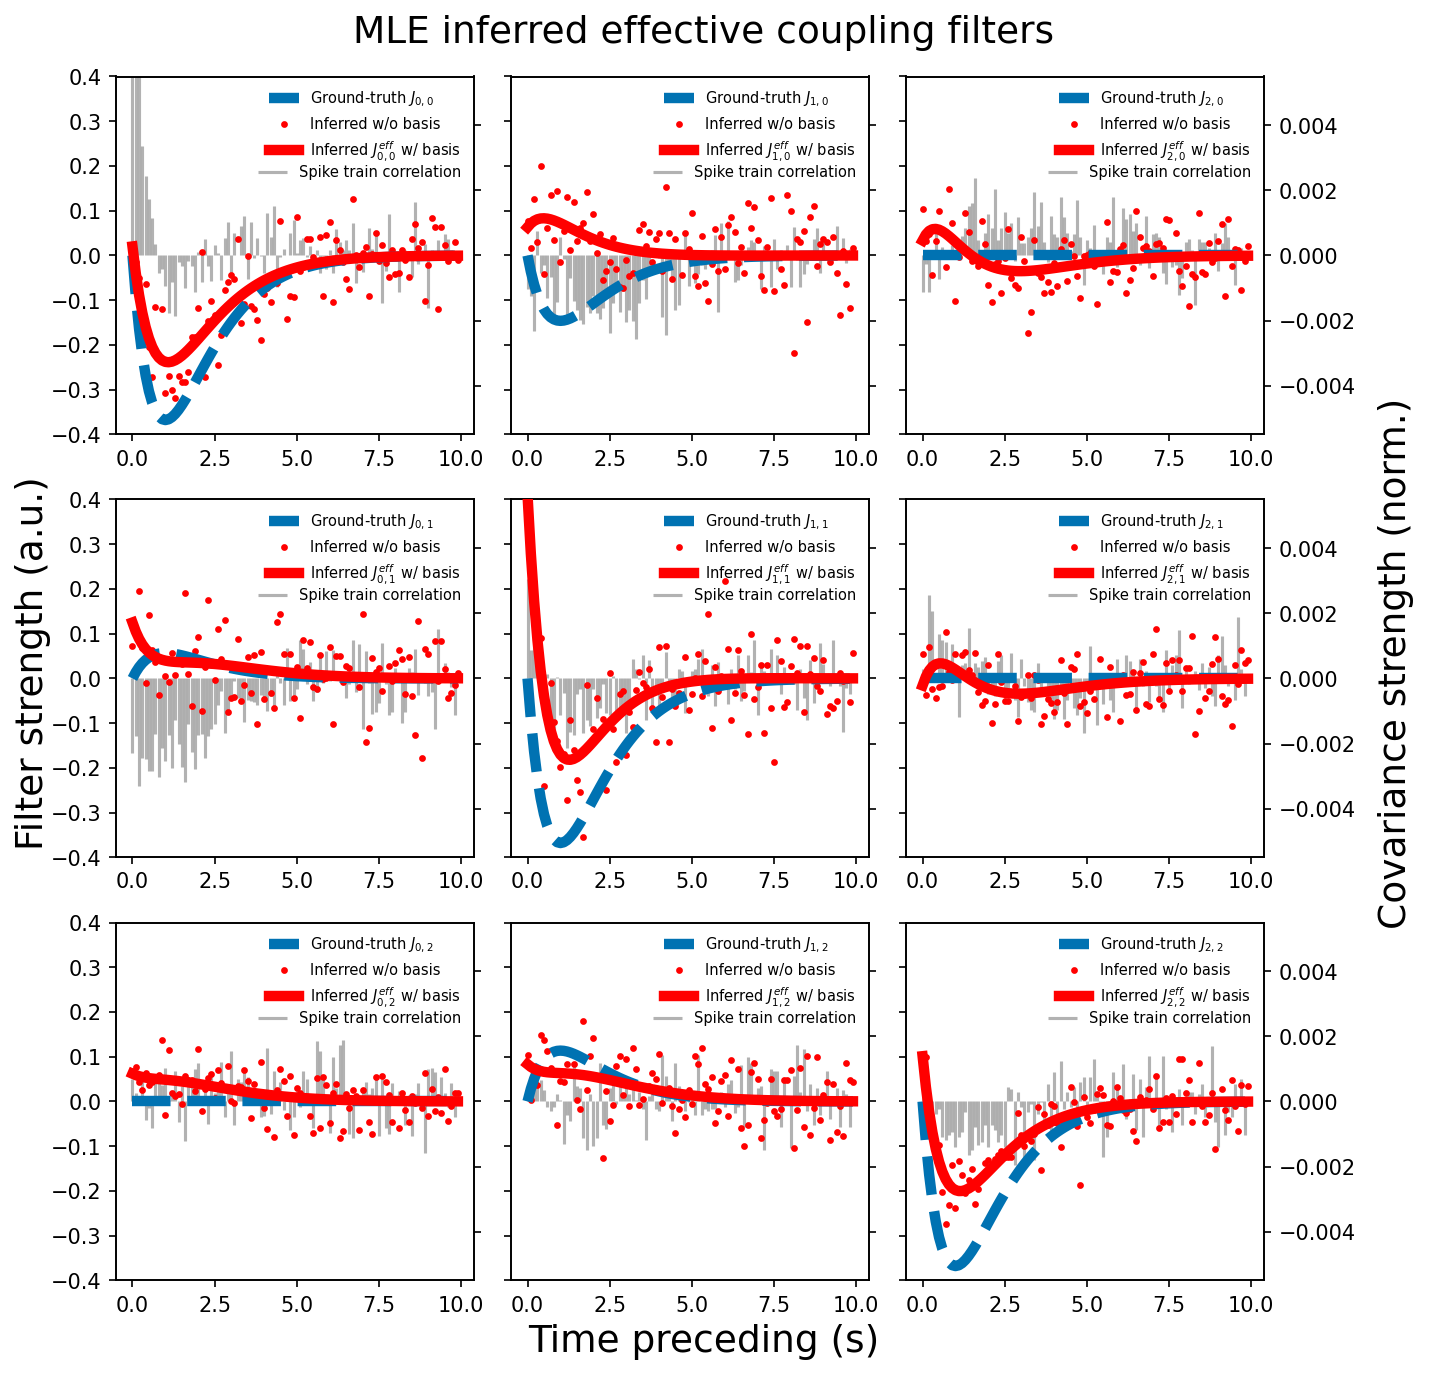

In [279]:
w_true = np.loadtxt("./figure_data/weight_matrix_-1_diag_weight_1.5")
plot_mle_cov(cov_3_3, inferred_with_basis_3_3, inferred_no_basis_3_3, w_true, savefig=True)

In [21]:
def plot_mle_cov_vary_obs(w_true, n=3, obs=[4, 8, 16, 32, 48, 64],figsize=(9.5, 7), data_dir="Spk64_2m_Data_volume_obs_-1_diag_weight_1_5", filename="MLE_vary_obs.pdf", savefig=False):
    fig, axs = plt.subplots(n, n, figsize=figsize, dpi=150)
    filter_length = 100
    dt = 0.1
    observed = list(range(n))
    for j in range(n):
        for i in range(n):
            ax2 = axs[i, j].twinx()
            alpha_filter = [w_true[observed[j], observed[i]]* k*np.exp(-k) for k in np.arange(filter_length)*dt]
            ax2.plot(np.arange(filter_length) * dt,
                           alpha_filter, '--', linewidth=5, label="Ground-truth")
            axs[i, j].yaxis.tick_right()
            for N_obs in obs:
                inferred_wo_basis = np.loadtxt(f"/home/tong/hidden-neuron-simulation/data/{data_dir}/J_{i}_{j}_{N_obs}_observed_2000000_data_no_basis.txt")

                ax2.plot(np.arange(filter_length) * dt, inferred_wo_basis, label="Inferred w/o basis {} observed".format(N_obs))
            ax2.set_ylim(-0.4, 0.4)
            ax2.yaxis.tick_left()
            ax2.text(0.8, 0.05, r"$J_{{{}{}}}$".format(i, j), transform=ax2.transAxes,
            size=15, weight='bold')
            if i == 1 and j == 1:
                ax2.legend(frameon=False, bbox_to_anchor=(1.05, 0), loc='lower left', prop={'size': 8})
            axs[i, j].set_yticklabels([])
            if j > 0:
                ax2.set_yticklabels([])
    fig.text(0.4, 1, 'MLE inferred effective coupling filters', ha='center', size=18)
    fig.text(0.4, -0.01, 'Time preceding (s)', ha='center', size=18)
    fig.text(-0.01, 0.5, 'Filter strength (a.u.)',
             va='center', rotation='vertical', size=18)
    fig.tight_layout()
    if savefig:
        fig.savefig(f'./Figures/{filename}', bbox_inches="tight")
        print("figure saved!")


## Figure 2. Inferred filters change as data volume and observed neuron change

figure saved!


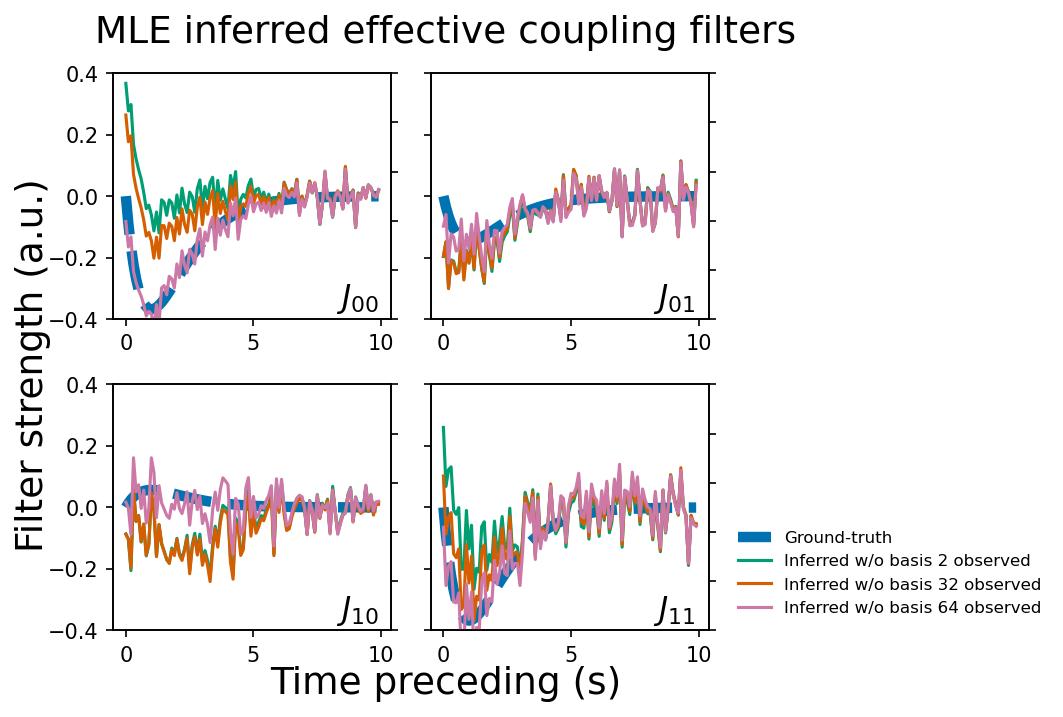

In [22]:
# from figure import plot_mle_cov_vary_obs

w_true = np.loadtxt("./figure_data/weight_matrix_-1_diag_weight_1.5")
plot_mle_cov_vary_obs(w_true, n=2, obs=[2,32,64], figsize=(7,4.3), data_dir="Spk64_2m_Data_volume_obs_-1_diag_weight_1_5", savefig=True)

In [44]:
def plot_mle_cov_vary_dp(w_true, n=3, obs=64, dp=[0.2, 0.4, 0.8, 1],figsize=(9.5, 7), total_data=2000000, data_dir="Spk64_2m_Data_volume_obs_-1_diag_weight_1_5", filename="MLE_vary_dp.pdf", savefig=False):
    fig, axs = plt.subplots(n, n*2, figsize=figsize, dpi=150)
    filter_length = 100
    dt = 0.1
    observed = list(range(n))
    for j in range(n):
        for i in range(n):
            ax2 = axs[i, j].twinx()
            alpha_filter = [w_true[observed[j], observed[i]]* k*np.exp(-k) for k in np.arange(filter_length)*dt]
            ax2.plot(np.arange(filter_length) * dt,
                           alpha_filter, '--', linewidth=5, label="Ground-truth")
            axs[i, j].yaxis.tick_right()
            for data_volume in [int(dp_*total_data) for dp_ in dp]:
                inferred_wo_basis = np.loadtxt(f"/home/tong/hidden-neuron-simulation/data/{data_dir}/J_{i}_{j}_{obs}_observed_{data_volume}_data_no_basis.txt")

                ax2.plot(np.arange(filter_length) * dt, inferred_wo_basis, "-.", label="Inferred w/o basis {} data".format(data_volume))
            ax2.set_ylim(-0.4, 0.4)
            ax2.yaxis.tick_left()
            ax2.text(0.8, 0.05, r"$J_{{{}{}}}$".format(i, j), transform=ax2.transAxes,
            size=15, weight='bold')
#             if i == 1 and j == 1:
#                 ax2.legend(frameon=False, bbox_to_anchor=(1.05, 0), loc='lower left', prop={'size': 8})
            axs[i, j].set_yticklabels([])
            if j > 0:
                ax2.set_yticklabels([])
#     fig.text(0.4, 1, 'MLE inferred effective coupling filters', ha='center', size=18)
    fig.text(0.4, -0.01, 'Time preceding (s)', ha='center', size=18)
    fig.text(-0.01, 0.5, 'Filter strength (a.u.)',
             va='center', rotation='vertical', size=18)
    fig.tight_layout()
    if savefig:
        fig.savefig(f'./Figures/{filename}', bbox_inches="tight")
        print("figure saved!")


<ipython-input-23-066202a017fc>:95: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


figure saved!


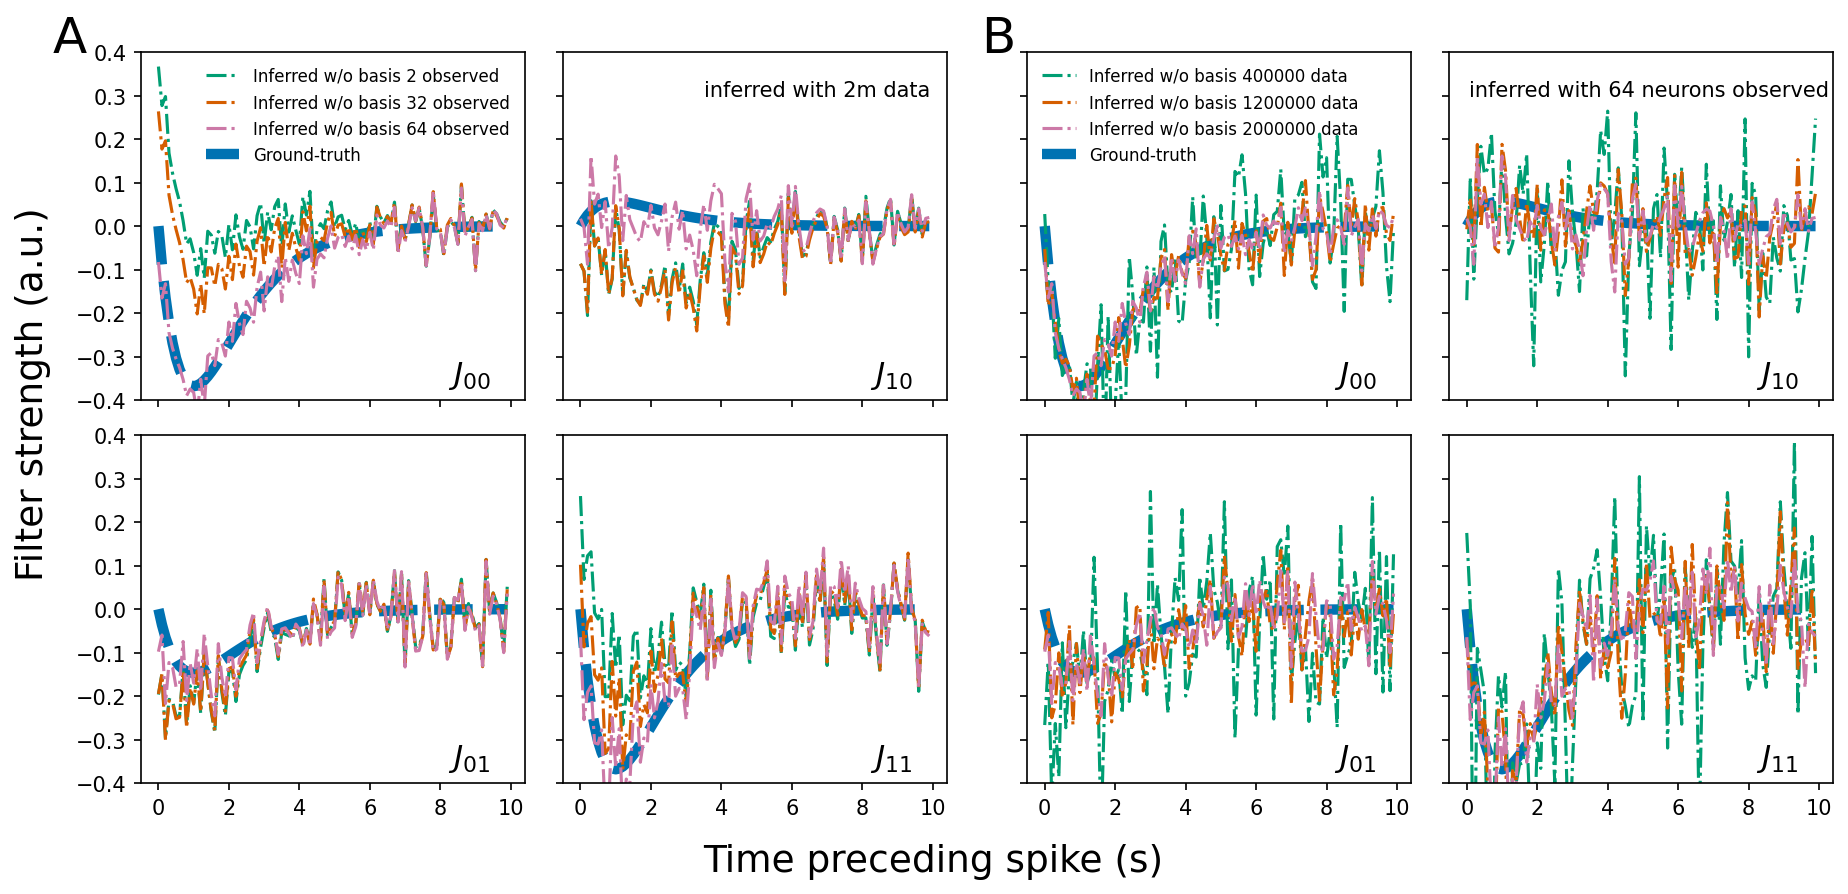

In [23]:
w_true = np.loadtxt("./figure_data/weight_matrix_-1_diag_weight_1.5")
n=2

dp=[0.2,0.6,1]
figsize=(12,6.5)
total_data=2000000
data_dir="Spk64_2m_Data_volume_obs_-1_diag_weight_1_5"
savefig=True

fig = plt.figure(constrained_layout=True, figsize=figsize, dpi=150)
gs0 = gridspec.GridSpec(1, 2, figure=fig, wspace=0.1, hspace=0, left=0.06, right=1, top=0.85, bottom=0.1)
gs00 = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=gs0[0],wspace=0.1, hspace=0.1)

# subfigs = fig.subfigures(1, 2, wspace=0, width_ratios=[1, 1.])
axs = np.array([[fig.add_subplot(gs00[i, j]) for i in range(n)] for j in range(n)])
# plt.subplots_adjust(left=None, bottom=None, right=0.8, top=None, wspace=None, hspace=None)

# fig, axs = plt.subplots(n, n, figsize=figsize, dpi=150)
filter_length = 100
dt = 0.1
observed = list(range(n))
obs=[2,32,64]
for j in range(n):
    for i in range(n):
        ax2 = axs[i, j]
        alpha_filter = [w_true[observed[j], observed[i]]* k*np.exp(-k) for k in np.arange(filter_length)*dt]
        ax2.plot(np.arange(filter_length) * dt,
                       alpha_filter, '--', linewidth=5, label="Ground-truth")
        axs[i, j].yaxis.tick_right()
        for N_obs in obs:
            inferred_wo_basis = np.loadtxt(f"/home/tong/hidden-neuron-simulation/data/{data_dir}/J_{i}_{j}_{N_obs}_observed_2000000_data_no_basis.txt")

            ax2.plot(np.arange(filter_length) * dt, inferred_wo_basis, "-.", label="Inferred w/o basis {} observed".format(N_obs))
        ax2.set_ylim(-0.4, 0.4)
        ax2.yaxis.tick_left()
        ax2.text(0.8, 0.05, r"$J_{{{}{}}}$".format(i, j), transform=ax2.transAxes,
        size=15, weight='bold')
        if i == 0 and j == 0:
            handles, labels = ax2.get_legend_handles_labels()
            order = [1, 2, 3, 0]
            ax2.legend([handles[idx] for idx in order], [
                             labels[idx] for idx in order], frameon=False, loc="upper right", prop={'size': 8})
#             ax2.legend(frameon=False, bbox_to_anchor=(1, 1), loc='upper right', prop={'size': 8})
#         axs[i, j].set_yticklabels([])
        if i > 0:
            ax2.set_yticklabels([])
        if j == 0:
            ax2.set_xticklabels([])
        if i == 1 and j == 0:
            ax2.text(3.5, 0.3, "inferred with 2m data")
            
axs[0,0].text(-0.23, 1, 'A', transform=axs[0,0].transAxes,
            size=24)

# axs = subfigs[1].subplots(2, 2)
gs00 = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=gs0[1],wspace=0.1, hspace=0.1)

# subfigs = fig.subfigures(1, 2, wspace=0, width_ratios=[1, 1.])
axs = np.array([[fig.add_subplot(gs00[i, j]) for i in range(n)] for j in range(n)])
obs=64

for j in range(n):
    for i in range(n):
        ax2 = axs[i, j]
        alpha_filter = [w_true[observed[j], observed[i]]* k*np.exp(-k) for k in np.arange(filter_length)*dt]
        ax2.plot(np.arange(filter_length) * dt,
                       alpha_filter, '--', linewidth=5, label="Ground-truth")
        axs[i, j].yaxis.tick_right()
        for data_volume in [int(dp_*total_data) for dp_ in dp]:
            inferred_wo_basis = np.loadtxt(f"/home/tong/hidden-neuron-simulation/data/{data_dir}/J_{i}_{j}_{obs}_observed_{data_volume}_data_no_basis.txt")

            ax2.plot(np.arange(filter_length) * dt, inferred_wo_basis, "-.", label="Inferred w/o basis {} data".format(data_volume))
        ax2.set_ylim(-0.4, 0.4)
        ax2.yaxis.tick_left()
        ax2.text(0.8, 0.05, r"$J_{{{}{}}}$".format(i, j), transform=ax2.transAxes,
        size=15, weight='bold')
        if i == 0 and j == 0:
            handles, labels = ax2.get_legend_handles_labels()
            order = [1, 2, 3, 0]
            ax2.legend([handles[idx] for idx in order], [
                             labels[idx] for idx in order], frameon=False, loc="upper left", prop={'size': 8})
        if i == 1 and j == 0:
            ax2.text(0.05, 0.3, "inferred with 64 neurons observed")
#         axs[i, j].set_yticklabels([])
#         if i > 0:
        ax2.set_yticklabels([])
        if j == 0:
            ax2.set_xticklabels([])
#     fig.text(0.4, 1, 'MLE inferred effective coupling filters', ha='center', size=18)
axs[0,0].text(-0.12, 1, 'B', transform=axs[0,0].transAxes,
            size=24)
fig.text(0.5, 0.01, 'Time preceding spike (s)', ha='center', size=18)
fig.text(-0.01, 0.5, 'Filter strength (a.u.)',
         va='center', rotation='vertical', size=18)
fig.tight_layout()
if savefig:
    fig.savefig(f'./Figures/MLE_vary_obs_dp.pdf', bbox_inches="tight")
    print("figure saved!")

## Figure 3. Correlation vs. Coupling Strength/Data Volume: random network with -1 diagonal

In [4]:
# correlation vs. coupling strength; fix 2m data volume
from filter_inference import calculate_corr_all

cov_path="/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_covariance_weight_1_5"
filter_path="/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_weight_1_5"
calculate_corr_all(N_i=0, N_j=0, cov_path=cov_path, filter_path=filter_path, dp=1, total_data=2000000)

{2: 0.9951793637142862,
 4: 0.9948402846948176,
 8: 0.9889732800600012,
 16: 0.9791397934633708,
 32: 0.8516396332842104,
 48: 0.27918911153300113,
 64: 0.16003356847688674}

In [9]:
calculate_corr_all(N_i=1, N_j=0, cov_path=cov_path, filter_path=filter_path, dp=1, total_data=2000000)

{2: 0.999190859097611,
 4: 0.9991612564451283,
 8: 0.9977739885008386,
 16: 0.9981696504827182,
 32: 0.9965737988025919,
 48: 0.8186210539344002,
 64: 0.6723482102134182}

In [23]:
calculate_corr_all(N_i=4, N_j=4, cov_path=cov_path, filter_path=filter_path, dp=1, total_data=2000000)

{8: 0.9833632522491005,
 16: 0.9329592608418429,
 32: 0.8249028950399405,
 48: 0.8054503482558419,
 64: 0.5254422107724198}

In [18]:
np.loadtxt("./figure_data/weight_matrix_-1_diag_weight_1.5")[:4,:4]

array([[-1.        ,  0.15426689,  0.        ,  0.        ],
       [-0.39727063, -1.        ,  0.30892423,  0.        ],
       [ 0.        ,  0.        , -1.        , -0.14465448],
       [-0.27726577,  0.        ,  0.04854696, -1.        ]])

Text(0.5, 1.0, 'Correlation decreases as more neurons observed')

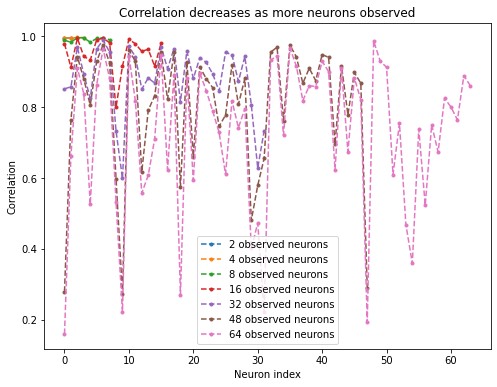

In [47]:
corr = {i: [] for i in [2, 4, 8, 16, 32, 48, 64]}

for i in range(64):
    for obs in [2, 4, 8, 16, 32, 48, 64]:
        corr_dict = calculate_corr_all(N_i=i, N_j=i, cov_path=cov_path, filter_path=filter_path, dp=1, total_data=2000000)
        if obs in corr_dict:   
            corr[obs].append(corr_dict[obs])

fig = plt.figure(figsize=(8,6))
corr_list = list(corr.values())
for i in range(len(corr_list)):
    plt.plot(corr_list[i], ".--", label=f"{list(corr.keys())[i]} observed neurons")
plt.legend()
# plt.yscale('log')
plt.xlabel("Neuron index")
plt.ylabel("Correlation")
plt.title("Correlation decreases as more neurons observed")

Text(0.5, 1.0, 'Correlation decreases as more neurons observed')

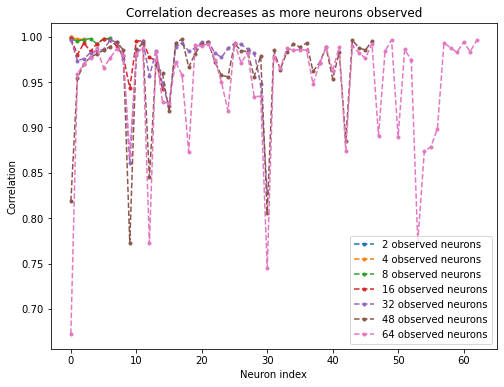

In [45]:
corr = {i: [] for i in [2, 4, 8, 16, 32, 48, 64]}

for i in range(1,64):
    for obs in [2, 4, 8, 16, 32, 48, 64]:
        corr_dict = calculate_corr_all(N_i=i, N_j=i-1, cov_path=cov_path, filter_path=filter_path, dp=1, total_data=2000000)
        if obs in corr_dict:   
            corr[obs].append(corr_dict[obs])

fig = plt.figure(figsize=(8,6))
corr_list = list(corr.values())
for i in range(len(corr_list)):
    plt.plot(corr_list[i], ".--", label=f"{list(corr.keys())[i]} observed neurons")
plt.legend()
plt.xlabel("Neuron index")
plt.ylabel("Correlation")
plt.title("Correlation decreases as more neurons observed")

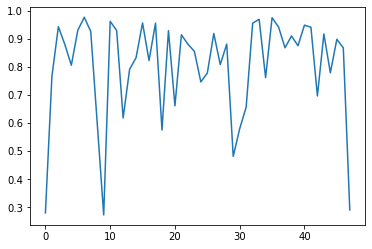

In [25]:
corr = []

for i in range(48):
    corr.append(calculate_corr_all(N_i=i, N_j=i, cov_path=cov_path, filter_path=filter_path, dp=1, total_data=2000000)[48])

plt.plot(corr)

In [59]:
corr_median = []
corr_std = []
for weight in ["_weight_0_5", "", "_weight_1_5"]:
    cov_path=f"/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_covariance{weight}"
    filter_path=f"/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag{weight}"
    corr = {i: [] for i in [2, 4, 8, 16, 32, 48, 64]}

    for i in range(64):
        for obs in [2, 4, 8, 16, 32, 48, 64]:
            corr_dict = calculate_corr_all(N_i=i, N_j=i, cov_path=cov_path, filter_path=filter_path, dp=1, total_data=2000000)
            if obs in corr_dict:   
                corr[obs].append(corr_dict[obs])
    corr_median.append( {key: np.median(value) for key, value in corr.items()})
    corr_std.append( {key: np.std(value) for key, value in corr.items()})

In [55]:
corr_median

[{2: 0.9965416676139596,
  4: 0.9966915448738791,
  8: 0.9968812702759882,
  16: 0.996568021173228,
  32: 0.9960281594989494,
  48: 0.9955572837961023,
  64: 0.9948610259380031},
 {2: 0.9976403692783299,
  4: 0.9968389002597847,
  8: 0.9963638744400962,
  16: 0.9945403514055844,
  32: 0.9895994659206119,
  48: 0.9844560985150018,
  64: 0.976051530446665},
 {2: 0.9950859226589855,
  4: 0.9957036406891381,
  8: 0.992202900597463,
  16: 0.9711897776101426,
  32: 0.8933445302447549,
  48: 0.8712607083694078,
  64: 0.7979984133265812}]

In [166]:
# mean firing rate
dt=0.1
firing_rates = []
median = []
max_firing = []
min_firing = []
mean = []
for j0 in ["_weight_0.5", "", "_weight_1.5"]:
    filename=f"spk_train_64_2000000_b_-2_-1_diag{j0}"
    with open(os.path.join("/home/tong/hidden-neuron-simulation/data", filename), "rb") as f:
        spk_train = pickle.load(f)
    mean_firing_rate = spk_train.spike_train[1000000:,:].mean(0)/dt
#     print("median", np.median(mean_firing_rate))
#     plt.hist(mean_firing_rate,20)
    firing_rates.append(mean_firing_rate)
    median.append(np.median(mean_firing_rate))
    mean.append(np.mean(mean_firing_rate))
    max_firing.append(np.max(mean_firing_rate))
    min_firing.append(np.min(mean_firing_rate))
#     plt.show()

In [180]:
filename=f"spk_train_64_2000000_b_-2_-1_diag"
with open(os.path.join("/home/tong/hidden-neuron-simulation/data", filename), "rb") as f:
    spk_train = pickle.load(f)

In [181]:
spk_train.p

0.5

(<Figure size 432x288 with 4 Axes>,
 array([[<AxesSubplot: >, <AxesSubplot: >],
        [<AxesSubplot: >, <AxesSubplot: >]], dtype=object))

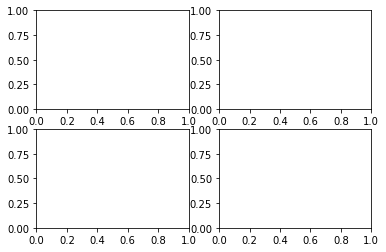

In [242]:
plt.subplots(2, 2)

/home/tong/anaconda3/envs/glm/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/tong/anaconda3/envs/glm/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/tong/anaconda3/envs/glm/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/tong/anaconda3/envs/glm/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/tong/anaconda3/envs/glm/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


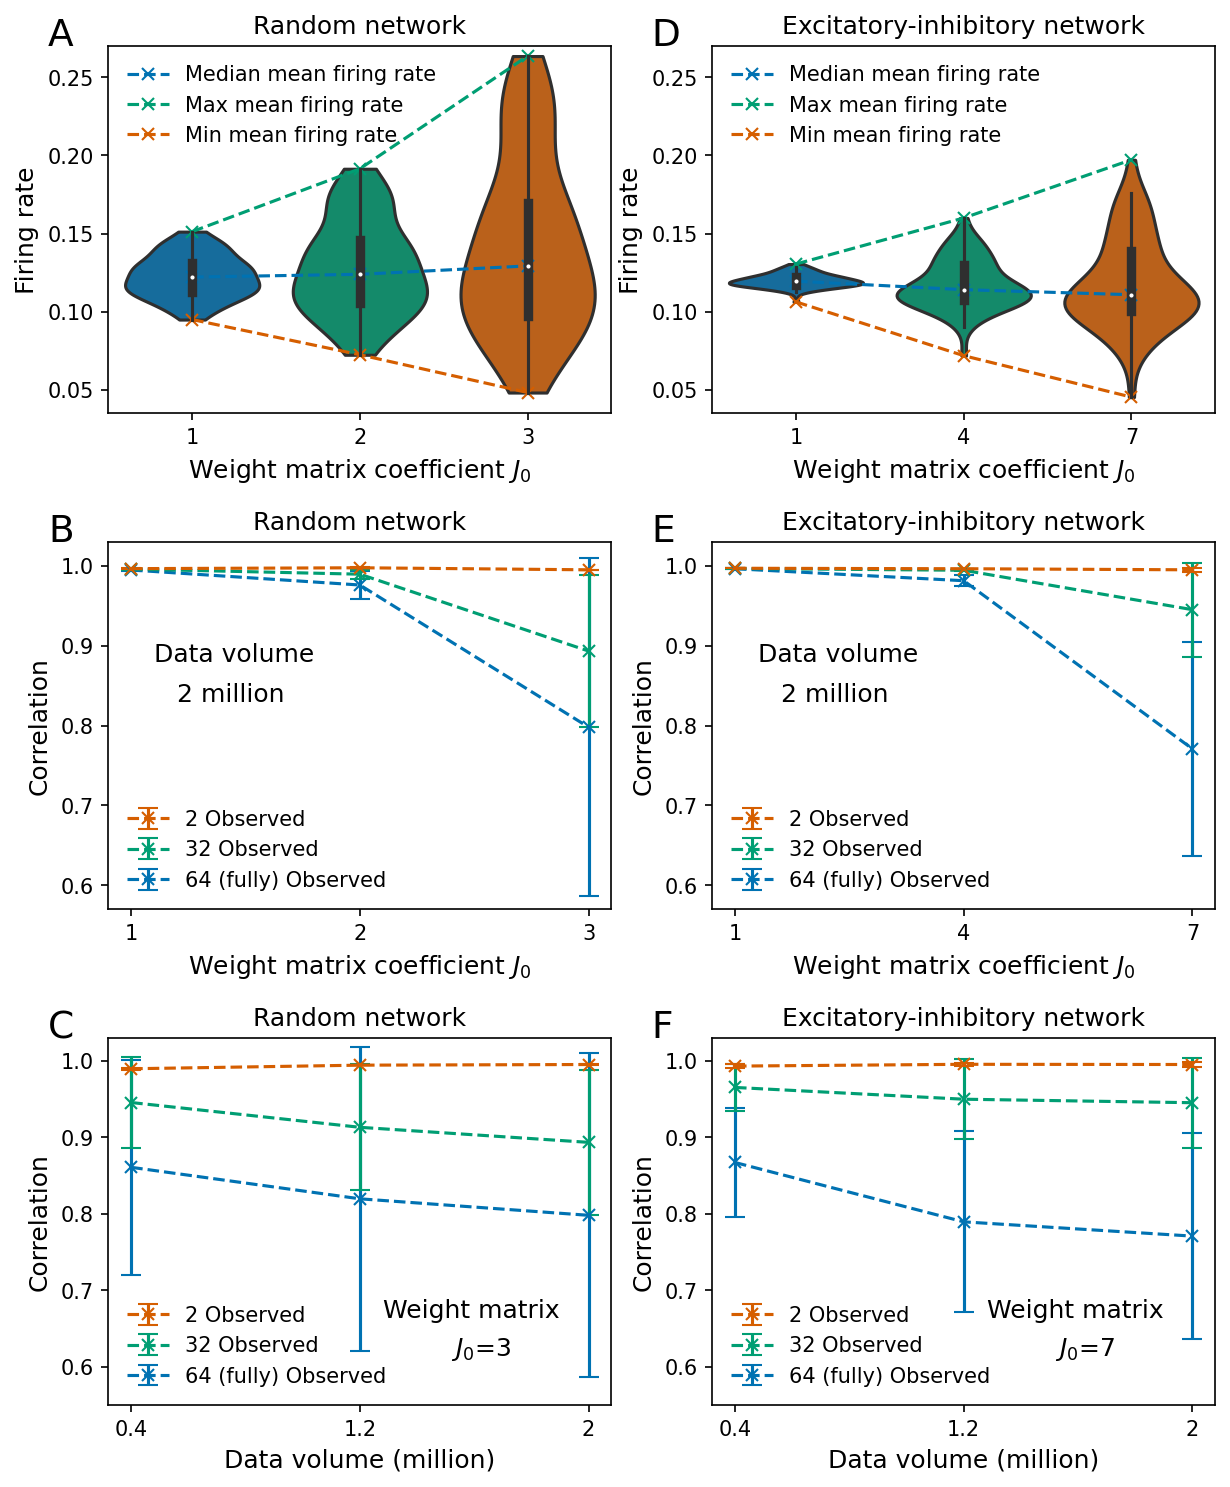

In [269]:
# from matplotlib.ticker import FormatStrFormatter

fig, ((ax11, ax22), (ax33, ax44), (ax55, ax66)) = plt.subplots(3, 2, figsize=(9, 12), dpi=150, constrained_layout=False, gridspec_kw={'width_ratios':[1,1], 'hspace':0.35, 'wspace':0.2, 'left':0.08})

ax2 = ax11
dt=0.1
firing_rates = []
median = []
max_firing = []
min_firing = []
mean = []
for j0 in ["_weight_0.5", "", "_weight_1.5"]:
    filename=f"spk_train_64_2000000_b_-2_-1_diag{j0}"
    with open(os.path.join("/home/tong/hidden-neuron-simulation/data", filename), "rb") as f:
        spk_train = pickle.load(f)
    mean_firing_rate = spk_train.spike_train[1000000:,:].mean(0)/dt
#     print("median", np.median(mean_firing_rate))
#     plt.hist(mean_firing_rate,20)
    firing_rates.append(mean_firing_rate)
    median.append(np.median(mean_firing_rate))
    mean.append(np.mean(mean_firing_rate))
    max_firing.append(np.max(mean_firing_rate))
    min_firing.append(np.min(mean_firing_rate))
    
x= [0, 1, 2]
ax2.plot(x,median, "--x", label="Median mean firing rate")
# ax2.plot([1, 2, 3],mean, "--x")
ax2.plot(x,max_firing, "--x", label="Max mean firing rate")
ax2.plot(x,min_firing, "--x", label="Min mean firing rate")
sns.violinplot(data=firing_rates, scale='width', cut=0, ax=ax2)
ax2.set_xticks(x, [1, 2, 3])
handles, labels = ax2.get_legend_handles_labels()
order = [0,1,2]
ax2.legend([handles[idx] for idx in order],[labels[idx] for idx in order], frameon=False)
# plt.legend(frameon=False)
ax2.set_xlabel("Weight matrix coefficient $J_0$", fontsize=12)
ax2.set_ylabel("Firing rate", fontsize=12)
ax2.set_ylim((0.035, 0.27))
# ax2.set_ylabel("Correlation", fontsize=15)
# plt.text(2.1, 0.68, "Weight matrix", fontsize=12)
# plt.text(2.4, 0.63, "$J_0$=3", fontsize=12)
# filename="Correlation_data_volume.pdf"    
ax2.set_title("Random network", fontsize=12)    
ax2.text(-0.12, 1, 'A', transform=ax2.transAxes,
            size=18)  

ax1 = ax33
corr_median = []
corr_std = []
for weight in ["_weight_0_5", "", "_weight_1_5"]:
    cov_path=f"/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_covariance{weight}"
    filter_path=f"/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag{weight}"
    corr = {i: [] for i in [2, 4, 8, 16, 32, 48, 64]}

    for i in range(64):
        for obs in [2, 4, 8, 16, 32, 48, 64]:
            corr_dict = calculate_corr_all(N_i=i, N_j=i, cov_path=cov_path, filter_path=filter_path, dp=1, total_data=2000000)
            if obs in corr_dict:   
                corr[obs].append(corr_dict[obs])
    corr_median.append( {key: np.median(value) for key, value in corr.items()})
    corr_std.append( {key: np.std(value) for key, value in corr.items()})
    
for obs in [2, 32, 64][::-1]:
    if obs == 64:
        full = "(fully) "
    else:
        full = ""
    ax1.errorbar([1, 2, 3], [corr_[obs] for corr_ in corr_median], yerr=[corr_[obs] for corr_ in corr_std], fmt="--x", capsize=5, label=f"{obs} {full}Observed")
handles, labels = ax1.get_legend_handles_labels()
order = [2,1,0]
ax1.legend([handles[idx] for idx in order],[labels[idx] for idx in order], frameon=False)
ax1.set_xlabel("Weight matrix coefficient $J_0$", fontsize=12)
ax1.set_ylabel("Correlation", fontsize=12)
# ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.set_xticks([1, 2, 3], [1, 2, 3])
ax1.text(1.1, 0.88, "Data volume", fontsize=12)
ax1.text(1.2, 0.83, "2 million", fontsize=12)
ax1.set_title("Random network", fontsize=12)
ax1.set_ylim((0.57,1.03))
ax1.text(-0.12, 1, 'B', transform=ax1.transAxes,
            size=18)


# EI network
dt=0.1
firing_rates = []
median = []
max_firing = []
min_firing = []
mean = []
for j0 in ["", "_weight_4", "_weight_7"]:
    filename=f"spk_train_64_2000000_b_-2_-1_diag_EI_network{j0}"
    with open(os.path.join("/home/tong/hidden-neuron-simulation/data", filename), "rb") as f:
        spk_train = pickle.load(f)
    mean_firing_rate = spk_train.spike_train[1000000:,:].mean(0)/dt
#     print("median", np.median(mean_firing_rate))
#     plt.hist(mean_firing_rate,20)
    firing_rates.append(mean_firing_rate)
    median.append(np.median(mean_firing_rate))
    mean.append(np.mean(mean_firing_rate))
    max_firing.append(np.max(mean_firing_rate))
    min_firing.append(np.min(mean_firing_rate))


ax2, ax1 = ax22, ax44

# fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(9, 3), dpi=150, constrained_layout=False)
x= [0, 1, 2]
ax2.plot(x,median, "--x", label="Median mean firing rate")
# ax2.plot([1, 2, 3],mean, "--x")
ax2.plot(x,max_firing, "--x", label="Max mean firing rate")
ax2.plot(x,min_firing, "--x", label="Min mean firing rate")
sns.violinplot(data=firing_rates, scale='width', cut=0, ax=ax2)
ax2.set_xticks(x, [1, 4, 7])
handles, labels = ax2.get_legend_handles_labels()
order = [0,1,2]
ax2.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc="upper left",frameon=False)
# plt.legend(frameon=False)
ax2.set_xlabel("Weight matrix coefficient $J_0$", fontsize=12)
ax2.set_ylabel("Firing rate", fontsize=12)
# ax2.set_ylabel("Correlation", fontsize=15)
# plt.text(2.1, 0.68, "Weight matrix", fontsize=12)
# plt.text(2.4, 0.63, "$J_0$=3", fontsize=12)
# filename="Correlation_data_volume.pdf"    
# ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax2.set_yticks((0.05,0.1,0.15,0.2))
# ax2.set_yticklabels(("0.05","0.10","0.15","0.20"))
ax2.set_ylim((0.035, 0.27))
ax2.set_title("Excitatory-inhibitory network", fontsize=12)
# ax2.set_ylim((0.035,0.224))
ax2.text(-0.12, 1, 'D', transform=ax2.transAxes,
            size=18)  

corr_median = []
corr_std = []
for weight in ["", "_weight_4", "_weight_7"]:
    cov_path=f"/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_covariance_EI_network{weight}"
    filter_path=f"/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_EI_network{weight}"
    corr = {i: [] for i in [2, 4, 8, 16, 32, 48, 64]}

    for i in range(64):
        for obs in [2, 32, 64]:
            corr_dict = calculate_corr_all(N_i=i, N_j=i, obs=[2,32,64], cov_path=cov_path, filter_path=filter_path, dp=dp, total_data=2000000)

#             corr_dict = calculate_corr_all(N_i=i, N_j=i, cov_path=cov_path, filter_path=filter_path, dp=1, total_data=2000000)
            if obs in corr_dict:   
                corr[obs].append(corr_dict[obs])
    corr_median.append( {key: np.median(value) for key, value in corr.items()})
    corr_std.append( {key: np.std(value) for key, value in corr.items()})
    
for obs in [2, 32, 64][::-1]:
    if obs == 64:
        full = "(fully) "
    else:
        full = ""
    ax1.errorbar([1, 2, 3], [corr_[obs] for corr_ in corr_median], yerr=[corr_[obs] for corr_ in corr_std], fmt="--x", capsize=5, label=f"{obs} {full}Observed")
handles, labels = ax1.get_legend_handles_labels()
order = [2,1,0]
ax1.legend([handles[idx] for idx in order],[labels[idx] for idx in order], frameon=False)
ax1.set_xlabel("Weight matrix coefficient $J_0$", fontsize=12)
ax1.set_ylabel("Correlation", fontsize=12)
ax1.set_xticks([1, 2, 3], [1, 4, 7])
ax1.text(1.1, 0.88, "Data volume", fontsize=12)
ax1.text(1.2, 0.83, "2 million", fontsize=12)
ax1.set_title("Excitatory-inhibitory network", fontsize=12)
ax1.set_ylim((0.57,1.03))
ax1.text(-0.12, 1, 'E', transform=ax1.transAxes,
            size=18)

# fig.text(0.5, 0.92, 'Random network', ha='center', size=16)

# fig.text(0.5, 0.47, 'Balanced EI network', ha='center', size=16)

# data volume
ax1, ax2 = ax55, ax66

corr_median = []
corr_std = []

cov_path=f"/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_covariance_weight_1_5"
filter_path=f"/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_weight_1_5"
for dp in [0.2, 0.6, 1]:
    corr = {i: [] for i in [2, 4, 8, 16, 32, 48, 64]}
    for i in range(64):
        corr_dict = calculate_corr_all(N_i=i, N_j=i, obs=[2,32,64], cov_path=cov_path, filter_path=filter_path, dp=dp, total_data=2000000)
        for obs in [2, 32, 64]:   
            if obs in corr_dict:   
                corr[obs].append(corr_dict[obs])    
    corr_median.append( {key: np.median(value) for key, value in corr.items()})
    corr_std.append( {key: np.std(value) for key, value in corr.items()})
for obs in [2, 32, 64][::-1]:
    if obs == 64:
        full = "(fully) "
    else:
        full = ""
    ax1.errorbar([1, 2, 3], [corr_[obs] for corr_ in corr_median], yerr=[corr_[obs] for corr_ in corr_std], fmt="--x", capsize=5, label=f"{obs} {full}Observed")
handles, labels = ax1.get_legend_handles_labels()
order = [2,1,0]
ax1.legend([handles[idx] for idx in order],[labels[idx] for idx in order], frameon=False)
# plt.legend(frameon=False)
ax1.set_xlabel("Data volume (million)", fontsize=12)
ax1.set_ylabel("Correlation", fontsize=12)
ax1.set_xticks([1, 2, 3], [0.4, 1.2, 2])
ax1.text(2.1, 0.665, "Weight matrix", fontsize=12)
ax1.text(2.4, 0.615, "$J_0$=3", fontsize=12) 
ax1.text(-0.12, 1, 'C', transform=ax1.transAxes,
            size=18)
ax1.set_title("Random network", fontsize=12)
ax1.set_ylim((0.55, 1.03))
# # filename="Correlation_J0.pdf"
# # plt.savefig(f'./Figures/{filename}', bbox_inches="tight")



corr_median = []
corr_std = []

cov_path=f"/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_covariance_EI_network_weight_7"
filter_path=f"/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_EI_network_weight_7"
for dp in [0.2, 0.6, 1]:
    corr = {i: [] for i in [2, 4, 8, 16, 32, 48, 64]}
    for i in range(64):
        corr_dict = calculate_corr_all(N_i=i, N_j=i, obs=[2,32,64], cov_path=cov_path, filter_path=filter_path, dp=dp, total_data=2000000)
        for obs in [2, 32, 64]:   
            if obs in corr_dict:   
                corr[obs].append(corr_dict[obs])
    corr_median.append( {key: np.median(value) for key, value in corr.items()})
    corr_std.append( {key: np.std(value) for key, value in corr.items()})
for obs in [2, 32, 64][::-1]:
    if obs == 64:
        full = "(fully) "
    else:
        full = ""
    ax2.errorbar([1, 2, 3], [corr_[obs] for corr_ in corr_median], yerr=[corr_[obs] for corr_ in corr_std], fmt="--x", capsize=5, label=f"{obs} {full}Observed")
handles, labels = ax2.get_legend_handles_labels()
order = [2,1,0]
ax2.legend([handles[idx] for idx in order],[labels[idx] for idx in order], frameon=False)
# plt.legend(frameon=False)
ax2.set_xlabel("Data volume (million)", fontsize=12)
ax2.set_ylabel("Correlation", fontsize=12)
ax2.set_xticks([1, 2, 3], [0.4, 1.2, 2])
ax2.text(2.1, 0.665, "Weight matrix", fontsize=12)
ax2.text(2.4, 0.615, "$J_0$=7", fontsize=12)
# filename="Correlation_data_volume.pdf"    
ax2.set_title("Excitatory-inhibitory network", fontsize=12)
ax2.text(-0.12, 1, 'F', transform=ax2.transAxes,
            size=18)
ax2.set_ylim((0.55, 1.03))


filename="Fig_3_Correlation_firing_rate_violin_random_EI_6panels.pdf"
plt.savefig(f'./Figures/{filename}', bbox_inches="tight")

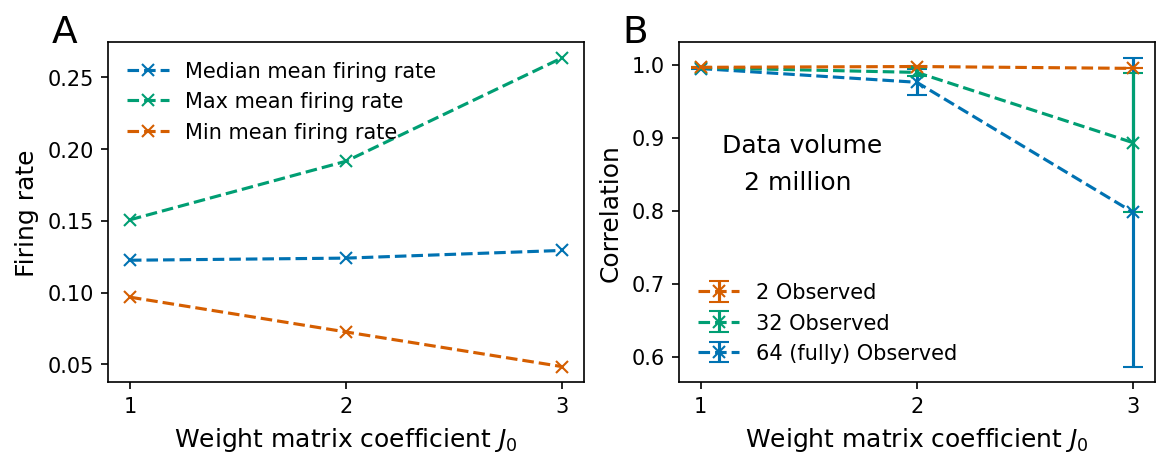

In [159]:
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(9, 3), dpi=150, constrained_layout=False)

ax2.plot([1, 2, 3],median, "--x", label="Median mean firing rate")
# ax2.plot([1, 2, 3],mean, "--x")
ax2.plot([1, 2, 3],max_firing, "--x", label="Max mean firing rate")
ax2.plot([1, 2, 3],min_firing, "--x", label="Min mean firing rate")
ax2.set_xticks([1, 2, 3], [1, 2, 3])
handles, labels = ax2.get_legend_handles_labels()
order = [0,1,2]
ax2.legend([handles[idx] for idx in order],[labels[idx] for idx in order], frameon=False)
# plt.legend(frameon=False)
ax2.set_xlabel("Weight matrix coefficient $J_0$", fontsize=12)
ax2.set_ylabel("Firing rate", fontsize=12)
# ax2.set_ylabel("Correlation", fontsize=15)
# plt.text(2.1, 0.68, "Weight matrix", fontsize=12)
# plt.text(2.4, 0.63, "$J_0$=3", fontsize=12)
# filename="Correlation_data_volume.pdf"    
    
ax2.text(-0.12, 1, 'A', transform=ax2.transAxes,
            size=18)  

corr_median = []
corr_std = []
for weight in ["_weight_0_5", "", "_weight_1_5"]:
    cov_path=f"/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_covariance{weight}"
    filter_path=f"/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag{weight}"
    corr = {i: [] for i in [2, 4, 8, 16, 32, 48, 64]}

    for i in range(64):
        for obs in [2, 4, 8, 16, 32, 48, 64]:
            corr_dict = calculate_corr_all(N_i=i, N_j=i, cov_path=cov_path, filter_path=filter_path, dp=1, total_data=2000000)
            if obs in corr_dict:   
                corr[obs].append(corr_dict[obs])
    corr_median.append( {key: np.median(value) for key, value in corr.items()})
    corr_std.append( {key: np.std(value) for key, value in corr.items()})
    
for obs in [2, 32, 64][::-1]:
    if obs == 64:
        full = "(fully) "
    else:
        full = ""
    ax1.errorbar([1, 2, 3], [corr_[obs] for corr_ in corr_median], yerr=[corr_[obs] for corr_ in corr_std], fmt="--x", capsize=5, label=f"{obs} {full}Observed")
handles, labels = ax1.get_legend_handles_labels()
order = [2,1,0]
ax1.legend([handles[idx] for idx in order],[labels[idx] for idx in order], frameon=False)
ax1.set_xlabel("Weight matrix coefficient $J_0$", fontsize=12)
ax1.set_ylabel("Correlation", fontsize=12)
ax1.set_xticks([1, 2, 3], [1, 2, 3])
ax1.text(1.1, 0.88, "Data volume", fontsize=12)
ax1.text(1.2, 0.83, "2 million", fontsize=12)

ax1.text(-0.12, 1, 'B', transform=ax1.transAxes,
            size=18)



filename="Fig_3_Correlation_firing_rate.pdf"
plt.savefig(f'./Figures/{filename}', bbox_inches="tight")

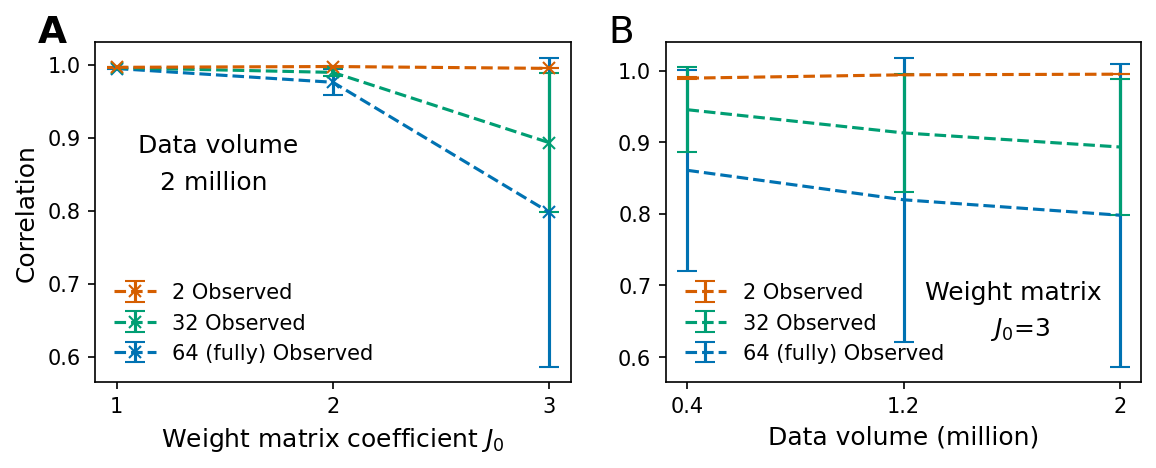

In [102]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3), dpi=150, constrained_layout=False)
corr_median = []
corr_std = []
for weight in ["_weight_0_5", "", "_weight_1_5"]:
    cov_path=f"/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_covariance{weight}"
    filter_path=f"/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag{weight}"
    corr = {i: [] for i in [2, 4, 8, 16, 32, 48, 64]}

    for i in range(64):
        for obs in [2, 4, 8, 16, 32, 48, 64]:
            corr_dict = calculate_corr_all(N_i=i, N_j=i, cov_path=cov_path, filter_path=filter_path, dp=1, total_data=2000000)
            if obs in corr_dict:   
                corr[obs].append(corr_dict[obs])
    corr_median.append( {key: np.median(value) for key, value in corr.items()})
    corr_std.append( {key: np.std(value) for key, value in corr.items()})
    
for obs in [2, 32, 64][::-1]:
    if obs == 64:
        full = "(fully) "
    else:
        full = ""
    ax1.errorbar([1, 2, 3], [corr_[obs] for corr_ in corr_median], yerr=[corr_[obs] for corr_ in corr_std], fmt="--x", capsize=5, label=f"{obs} {full}Observed")
handles, labels = ax1.get_legend_handles_labels()
order = [2,1,0]
ax1.legend([handles[idx] for idx in order],[labels[idx] for idx in order], frameon=False)
ax1.set_xlabel("Weight matrix coefficient $J_0$", fontsize=12)
ax1.set_ylabel("Correlation", fontsize=12)
ax1.set_xticks([1, 2, 3], [1, 2, 3])
ax1.text(1.1, 0.88, "Data volume", fontsize=12)
ax1.text(1.2, 0.83, "2 million", fontsize=12)

ax1.text(-0.12, 1, 'A', transform=ax1.transAxes,
            size=18, weight='bold')

# filename="Correlation_J0.pdf"
# plt.savefig(f'./Figures/{filename}', bbox_inches="tight")
corr_median = []
corr_std = []

cov_path=f"/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_covariance_weight_1_5"
filter_path=f"/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_weight_1_5"
for dp in [0.2, 0.6, 1]:
    corr = {i: [] for i in [2, 4, 8, 16, 32, 48, 64]}
    for i in range(64):
        for obs in [2, 4, 8, 16, 32, 48, 64]:
            corr_dict = calculate_corr_all(N_i=i, N_j=i, cov_path=cov_path, filter_path=filter_path, dp=dp, total_data=2000000)
            if obs in corr_dict:   
                corr[obs].append(corr_dict[obs])
    corr_median.append( {key: np.median(value) for key, value in corr.items()})
    corr_std.append( {key: np.std(value) for key, value in corr.items()})
for obs in [2, 32, 64][::-1]:
    if obs == 64:
        full = "(fully) "
    else:
        full = ""
    plt.errorbar([1, 2, 3], [corr_[obs] for corr_ in corr_median], yerr=[corr_[obs] for corr_ in corr_std], fmt="--", capsize=5, label=f"{obs} {full}Observed")
handles, labels = plt.gca().get_legend_handles_labels()
order = [2,1,0]
ax2.legend([handles[idx] for idx in order],[labels[idx] for idx in order], frameon=False)
# plt.legend(frameon=False)
ax2.set_xlabel("Data volume (million)", fontsize=12)
# ax2.set_ylabel("Correlation", fontsize=15)
ax2.set_xticks([1, 2, 3], [0.4, 1.2, 2])
plt.text(2.1, 0.68, "Weight matrix", fontsize=12)
plt.text(2.4, 0.63, "$J_0$=3", fontsize=12)
# filename="Correlation_data_volume.pdf"    
    
ax2.text(-0.12, 1, 'B', transform=ax2.transAxes,
            size=18)  
filename="Fig_3_Correlation_data_volume.pdf"
plt.savefig(f'./Figures/{filename}', bbox_inches="tight")

## Figure 4

In [281]:
import seaborn as sns
from matplotlib import cm
import string


def plot_correlation(cov_path="/home/tong/hidden-neuron-simulation/data/2022-10-04", filter_path="/home/tong/hidden-neuron-simulation/data/2022-10-05-data-volume", filter_type="self-coupling", data_volume_percent=[0.2, 0.4, 0.6, 0.8, 1], total_data=1000000, ylim=[0.08, 1.15], fig_name="correlation.pdf", savefig=False):
        # self-coupling correlation
    fig, axs = plt.subplots(3, 2, figsize=(7, 10), dpi=150)

    corr_per_dp_median = []
    corr_per_dp_mean = []
    for j, dp in enumerate(data_volume_percent):
        corr_per_observed = {i: [] for i in [2, 4, 8, 16, 32, 48, 64]}
    #     print(corr_per_observed)
        for N in [i for i in range(64)]:
            N_j = N
            if filter_type == "cross-coupling-random":
                N_i = 0 if N == 0 else np.random.choice(N, 1)[0]
            elif filter_type == "cross-coupling-zero":
                w_true = np.loadtxt("/home/tong/hidden-neuron-simulation/src/figure_data/weight_matrix_ground_truth.txt")
                w_true_zero = [[idx for idx, i in enumerate(w_true[j,:]) if i == 0] for j in range(w_true.shape[0])]
                N_i = 0 if N == 0 else np.random.choice(w_true_zero[N_i], 1)[0]
            elif filter_type == "cross_coupling-partition-EI":
                pass
            else:
                N_i = N
    #         print(N_i, N_j)
#             if dp == 1:
#                 corr = calculate_corr_all(N_i=N_i, N_j=N_j, cov_path="/home/tong/hidden-neuron-simulation/data/2022-09-27", filter_path="/home/tong/hidden-neuron-simulation/data/2022-10-05-data-volume", dp=dp)
#             else:
            corr = calculate_corr_all(N_i=N_i, N_j=N_j, cov_path=cov_path, filter_path=filter_path, dp=dp, total_data=total_data)

            for k, v in corr.items():
                corr_per_observed[k].append(v)

        sns.violinplot(data=[np.array(corr_per_observed[i]) for i in [2, 4, 8, 16, 32, 48, 64]], scale='width', ax=axs[j//2, j%2], cut=0)
#         if filter_type == "cross-coupling":
#             axs[j//2, j%2].set_ylim([0.8, 1.05])
#         else:
        axs[j//2, j%2].set_ylim(ylim)
        axs[j//2, j%2].set_xticklabels([f"{i/64:.0%}" for i in [2, 4, 8, 16, 32, 48, 64]])
        axs[j//2, j%2].text(-0.2, 0.08+ylim[0], f"Spike train data volume: {int(dp*total_data)}", size=9)
        axs[j//2, j%2].text(-0.1, 1.0, string.ascii_uppercase[j], transform=axs[j//2, j%2].transAxes,
                             size=12, weight='bold')
    #     if j//2 == 2:
    #         axs[j//2, j%2].set_xlabel("Percentage of Neuron Observed")
        corr_per_dp_median.append([np.median(corr) for corr in corr_per_observed.values()])
        corr_per_dp_mean.append([np.mean(corr) for corr in corr_per_observed.values()])
    extent = [-0.5, 6.5, -0.5, 4.5]
    im = axs[2,1].imshow(np.array(corr_per_dp_median), extent=extent, origin='lower', aspect='auto',cmap=cm.get_cmap('spring'))
    # ax.colorbar()
    axs[2,1].text(-1.8,2, "Data Volume ($\\times$ $10^6$)", va='center', rotation='vertical')
    # axs[2,1].set_xlabel("Percentage of Neuron Observed")
    axs[2,1].set_xticks(np.arange(7))
    axs[2,1].set_xticklabels([f"{i/64:.0%}" for i in [2, 4, 8, 16, 32, 48, 64]])

    axs[2,1].set_yticks(np.arange(len(data_volume_percent)))
    axs[2,1].set_yticklabels([dp*total_data/1000000 for dp in data_volume_percent])
    axs[2,1].text(-0.1, 1.0, "F", transform=axs[2,1].transAxes,
                             size=12, weight='bold')
    jump_x = 7 / (1 * 7)
    jump_y = 1 / (1 * 5)

    x_positions = np.linspace(start=-1, stop=6, num=7, endpoint=False)
    y_positions = np.linspace(start=-0.2, stop=4.8, num=5, endpoint=False)
    for y_index, y in enumerate(y_positions):
        for x_index, x in enumerate(x_positions):
            label = f"{np.array(corr_per_dp_median)[y_index, x_index]:.3f}"
            text_x = x + jump_x
            text_y = y + jump_y
            axs[2,1].text(text_x, text_y, label, color='black', ha='center', va='center',size=8)

    # axs[2,1].set_title("Correlation of inferred filter and spike train correlation", size=10)
    # plt.colorbar(im, ticks=np.linspace(0.75, 1, 11), ax=axs[2,1])
    fig.text(0.05, 0.5, "Correlation between spike train autocorrelation and MLE inferred self-coupling filters", va='center', rotation='vertical', size=12)
    fig.text(0.5, 0.08, "Percentage of neuron observed", ha='center', size=12)
    if savefig:
        fig.savefig(f'./Figures/{fig_name}', bbox_inches="tight")
        print(f"figure saved at './Figures/{fig_name}'!")

figure saved at './Figures/Fig4_coupling_correlation_2m_-1_diag_weight_1_5.pdf'!


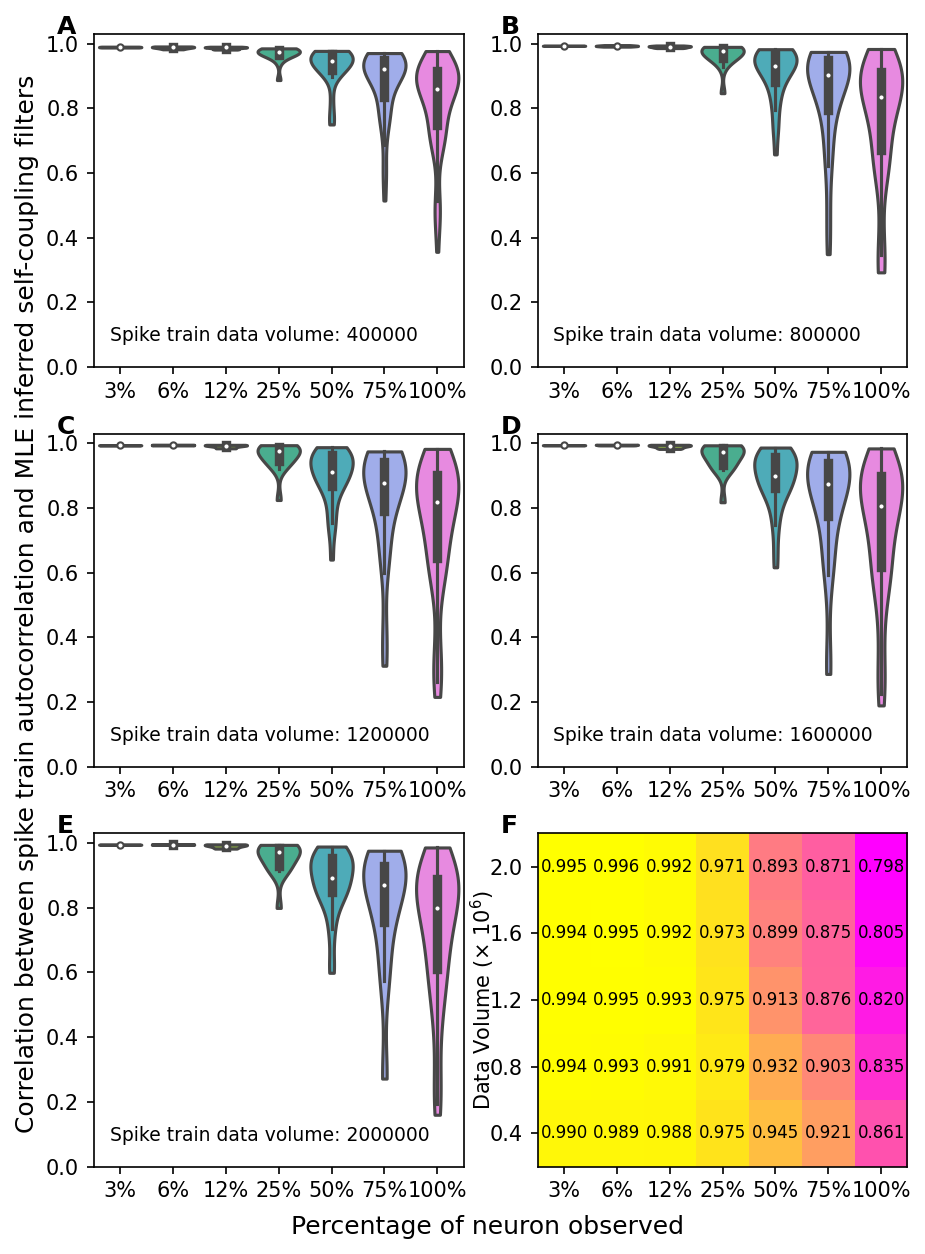

In [100]:
plot_correlation(cov_path="/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_covariance_weight_1_5", \
                 filter_path="/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_weight_1_5", \
                 filter_type="self-coupling", \
                 data_volume_percent=[0.2, 0.4, 0.6, 0.8, 1], \
                 total_data=2000000,\
                 ylim=[0, 1.03], \
                 fig_name="Fig4_coupling_correlation_2m_-1_diag_weight_1_5.pdf", \
                 savefig=True)

figure saved at './Figures/Appendix_cross_coupling_correlation_2m_-1_diag_weight_1_5.pdf'!


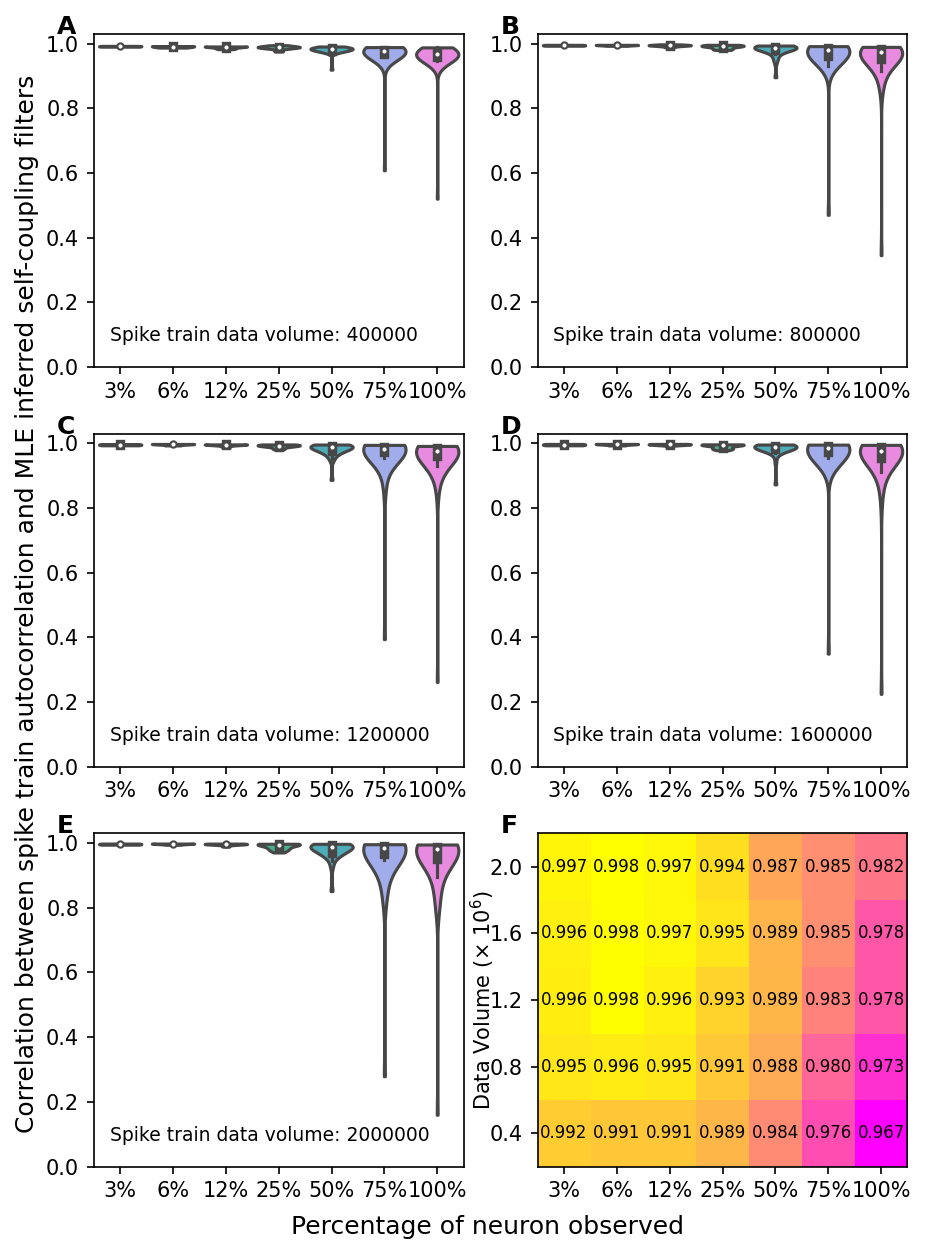

In [283]:
# randomly samples cross couplings; so each run will give slightly different results
plot_correlation(cov_path="/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_covariance_weight_1_5", \
                 filter_path="/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_weight_1_5", \
                 filter_type="cross-coupling-random", \
                 data_volume_percent=[0.2, 0.4, 0.6, 0.8, 1], \
                 total_data=2000000,\
                 ylim=[0, 1.03], \
                 fig_name="Appendix_cross_coupling_correlation_2m_-1_diag_weight_1_5.pdf", \
                 savefig=True)

# Fig 5: EI network

In [165]:
for j0 in [5, 7]:
    filename=f"spk_train_64_2000000_b_-2_EI_weight_{j0}"
    with open(os.path.join("/home/tong/hidden-neuron-simulation/data", filename), "rb") as f:
        spk_train = pickle.load(f)
    mean_firing_rate = spk_train.spike_train[1000000:,:].mean(0)/dt
#     print("median", np.median(mean_firing_rate))
#     plt.hist(mean_firing_rate,20)
    print(np.median(mean_firing_rate),np.max(mean_firing_rate),np.min(mean_firing_rate))

0.11280499999999999 0.16909 0.062189999999999995
0.11105499999999999 0.19759 0.04724


In [164]:
filename=f"spk_train_64_2000000_b_-2_-1_diag_EI_network"
with open(os.path.join("/home/tong/hidden-neuron-simulation/data", filename), "rb") as f:
    spk_train = pickle.load(f)
mean_firing_rate = spk_train.spike_train[1000000:,:].mean(0)/dt
print(np.median(mean_firing_rate),np.max(mean_firing_rate),np.min(mean_firing_rate))

0.119575 0.13055 0.10635


/home/tong/anaconda3/envs/glm/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/tong/anaconda3/envs/glm/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/tong/anaconda3/envs/glm/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/tong/anaconda3/envs/glm/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/tong/anaconda3/envs/glm/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


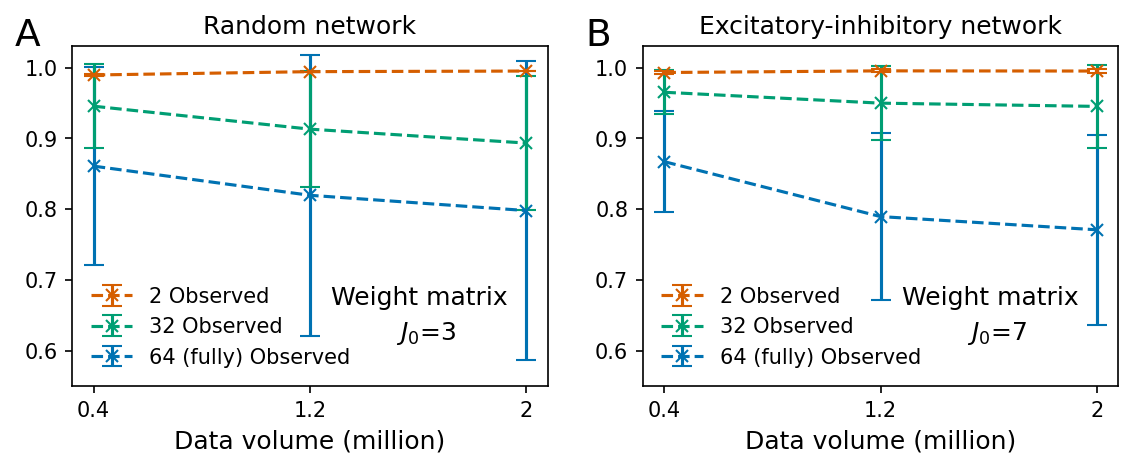

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3), dpi=150, constrained_layout=False)

corr_median = []
corr_std = []

cov_path=f"/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_covariance_weight_1_5"
filter_path=f"/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_weight_1_5"
for dp in [0.2, 0.6, 1]:
    corr = {i: [] for i in [2, 4, 8, 16, 32, 48, 64]}
    for i in range(64):
        corr_dict = calculate_corr_all(N_i=i, N_j=i, obs=[2,32,64], cov_path=cov_path, filter_path=filter_path, dp=dp, total_data=2000000)
        for obs in [2, 32, 64]:   
            if obs in corr_dict:   
                corr[obs].append(corr_dict[obs])    
    corr_median.append( {key: np.median(value) for key, value in corr.items()})
    corr_std.append( {key: np.std(value) for key, value in corr.items()})
for obs in [2, 32, 64][::-1]:
    if obs == 64:
        full = "(fully) "
    else:
        full = ""
    ax1.errorbar([1, 2, 3], [corr_[obs] for corr_ in corr_median], yerr=[corr_[obs] for corr_ in corr_std], fmt="--x", capsize=5, label=f"{obs} {full}Observed")
handles, labels = ax1.get_legend_handles_labels()
order = [2,1,0]
ax1.legend([handles[idx] for idx in order],[labels[idx] for idx in order], frameon=False)
# plt.legend(frameon=False)
ax1.set_xlabel("Data volume (million)", fontsize=12)
# ax2.set_ylabel("Correlation", fontsize=15)
ax1.set_xticks([1, 2, 3], [0.4, 1.2, 2])
ax1.text(2.1, 0.665, "Weight matrix", fontsize=12)
ax1.text(2.4, 0.615, "$J_0$=3", fontsize=12) 
ax1.text(-0.12, 1, 'A', transform=ax1.transAxes,
            size=18)
ax1.set_title("Random network", fontsize=12)
ax1.set_ylim((0.55, 1.03))
# # filename="Correlation_J0.pdf"
# # plt.savefig(f'./Figures/{filename}', bbox_inches="tight")
corr_median = []
corr_std = []

cov_path=f"/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_covariance_EI_network_weight_7"
filter_path=f"/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_EI_network_weight_7"
for dp in [0.2, 0.6, 1]:
    corr = {i: [] for i in [2, 4, 8, 16, 32, 48, 64]}
    for i in range(64):
        corr_dict = calculate_corr_all(N_i=i, N_j=i, obs=[2,32,64], cov_path=cov_path, filter_path=filter_path, dp=dp, total_data=2000000)
        for obs in [2, 32, 64]:   
            if obs in corr_dict:   
                corr[obs].append(corr_dict[obs])
    corr_median.append( {key: np.median(value) for key, value in corr.items()})
    corr_std.append( {key: np.std(value) for key, value in corr.items()})
for obs in [2, 32, 64][::-1]:
    if obs == 64:
        full = "(fully) "
    else:
        full = ""
    ax2.errorbar([1, 2, 3], [corr_[obs] for corr_ in corr_median], yerr=[corr_[obs] for corr_ in corr_std], fmt="--x", capsize=5, label=f"{obs} {full}Observed")
handles, labels = ax2.get_legend_handles_labels()
order = [2,1,0]
ax2.legend([handles[idx] for idx in order],[labels[idx] for idx in order], frameon=False)
# plt.legend(frameon=False)
ax2.set_xlabel("Data volume (million)", fontsize=12)
# ax2.set_ylabel("Correlation", fontsize=15)
ax2.set_xticks([1, 2, 3], [0.4, 1.2, 2])
ax2.text(2.1, 0.665, "Weight matrix", fontsize=12)
ax2.text(2.4, 0.615, "$J_0$=7", fontsize=12)
# filename="Correlation_data_volume.pdf"    
ax2.set_title("Excitatory-inhibitory network", fontsize=12)
ax2.text(-0.12, 1, 'B', transform=ax2.transAxes,
            size=18)
ax2.set_ylim((0.55, 1.03))
filename="Fig_5_EI_Correlation_data_volume.pdf"
plt.savefig(f'./Figures/{filename}', bbox_inches="tight")

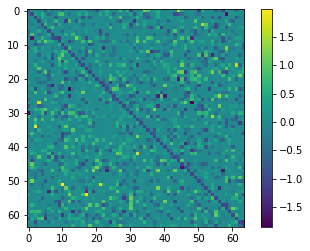

In [26]:
# heat map of the weight matrix
filename=f"spk_train_64_2000000_b_-2_-1_diag_weight_1.5"
with open(os.path.join("/home/tong/hidden-neuron-simulation/data", filename), "rb") as f:
    spk_train = pickle.load(f)
plt.imshow(spk_train.weight_matrix)
plt.colorbar()

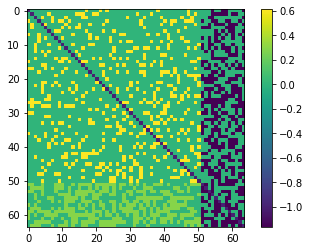

In [28]:
filename=f"spk_train_64_2000000_b_-2_-1_diag_EI_network_weight_7"
with open(os.path.join("/home/tong/hidden-neuron-simulation/data", filename), "rb") as f:
    spk_train = pickle.load(f)
plt.imshow(spk_train.weight_matrix)
plt.colorbar()

In [30]:
spk_train.weight_matrix

array([[-1.     ,  0.     ,  0.     , ..., -0.     , -0.     , -1.16375],
       [ 0.     , -1.     ,  0.     , ..., -1.16375, -0.     , -0.     ],
       [ 0.     ,  0.     , -1.     , ..., -0.     , -0.     , -1.16375],
       ...,
       [ 0.28875,  0.     ,  0.     , ..., -1.     , -1.16375, -1.16375],
       [ 0.     ,  0.     ,  0.28875, ..., -1.16375, -1.     , -0.     ],
       [ 0.     ,  0.28875,  0.28875, ..., -0.     , -1.16375, -1.     ]])

In [31]:
filename=f"spk_train_64_2000000_b_-2_-1_diag_EI_network"
with open(os.path.join("/home/tong/hidden-neuron-simulation/data", filename), "rb") as f:
    spk_train = pickle.load(f)
spk_train.weight_matrix

array([[-1.     ,  0.     ,  0.     , ..., -0.     , -0.     , -0.16625],
       [ 0.     , -1.     ,  0.     , ..., -0.16625, -0.     , -0.     ],
       [ 0.     ,  0.     , -1.     , ..., -0.     , -0.     , -0.16625],
       ...,
       [ 0.04125,  0.     ,  0.     , ..., -1.     , -0.16625, -0.16625],
       [ 0.     ,  0.     ,  0.04125, ..., -0.16625, -1.     , -0.     ],
       [ 0.     ,  0.04125,  0.04125, ..., -0.     , -0.16625, -1.     ]])

# 1 neuron all 2 all

In [33]:
from filter_inference import infer_J_ij

filename=f"spk_train_64_2000000_b_-2_J_0.037_all2all"
with open(os.path.join("/home/tong/hidden-neuron-simulation/data", filename), "rb") as f:
    spk_train = pickle.load(f)
spk_train.weight_matrix

obs = 1
dp=1
inferred_no_basis_3_3 = []
inferred_with_basis_3_3 = []
no_basis = infer_J_ij(spk_train.spike_train, 0, 0, data_percent=dp, \
                               with_basis=False, save=True, observed_neurons=range(obs), tol=1e-8)
w_basis = infer_J_ij(spk_train.spike_train, 0, 0, data_percent=dp, \
                               with_basis=True, save=True, observed_neurons=range(obs), tol=1e-8)

inferring with 2000000 data and 1 observed neurons without basis...
design shape: (2000000, 100)
TweedieRegressor(alpha=0, link='log', max_iter=200000, power=1, tol=1e-08)
Time took for MLE 4.84 s
inferring with 2000000 data and 1 observed neurons with basis order [0, 1, 2]...
Time took for MLE 4.09 s


In [46]:
from covariance import cov_estimate

cov00 = cov_estimate(spk_train.spike_train, 0, 0, max_t_steps=100, data_percent=1, norm=True, save=False, dir_name=None, filename=None)

correlation [0, 0] estimation with 2000000 data...
Time took for covariance estimation 51.92 s


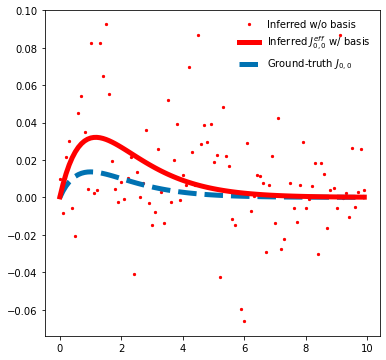

In [44]:
fig = plt.figure(figsize=(6,6))
filter_length = 100
plt.scatter(np.arange(filter_length) * dt, no_basis, s=5, color='red', label="Inferred w/o basis")

plt.plot(np.arange(filter_length) * dt, w_basis, linewidth=5, label=r"Inferred $J^{{eff}}_{{{},{}}}$ w/ basis".format(0,0), color='red', zorder=100)
# plt.ylim(-0.4, 0.4)
alpha_filter = [0.037* k*np.exp(-k) for k in np.arange(filter_length)*dt]
plt.plot(np.arange(filter_length) * dt,
               alpha_filter, '--', linewidth=5, label=r"Ground-truth $J_{{{},{}}}$".format(0,0))
plt.legend(frameon=False)

<ipython-input-270-ce2e448d1980>:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


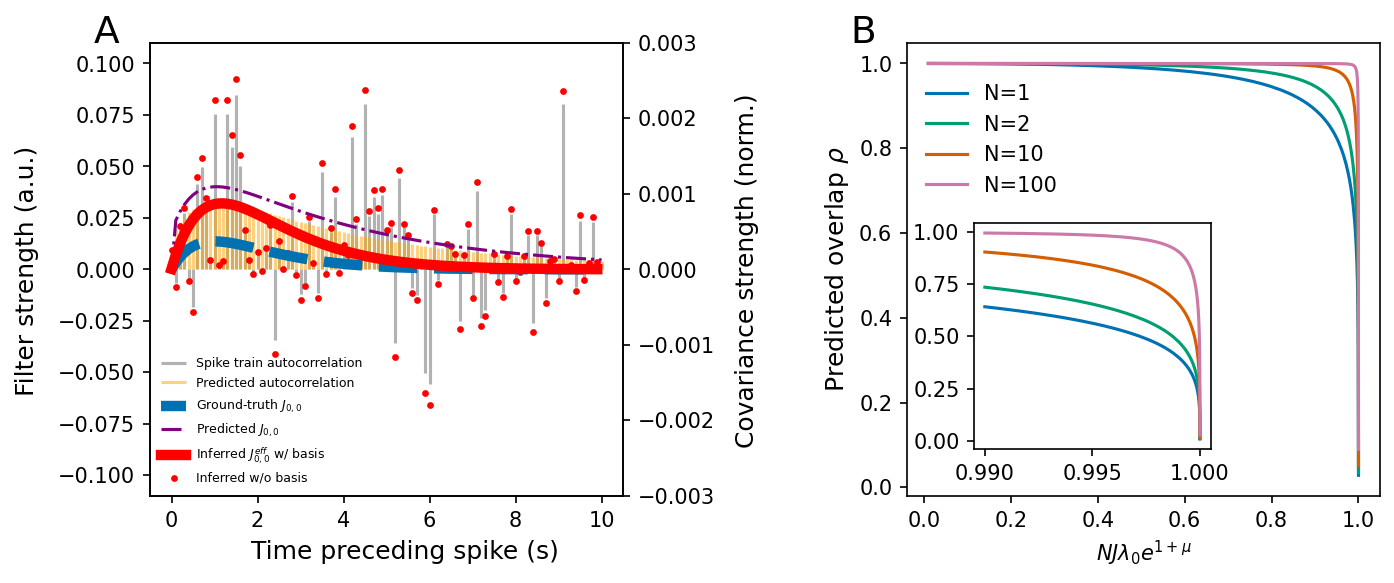

In [270]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, (axs, axs2) = plt.subplots(1, 2, figsize=(10,4), dpi=150, gridspec_kw={'width_ratios':[1,1], 'hspace':0.2, 'wspace':0.6, 'left':0.08})
filter_length = 100
dt = 0.1
ax2 = axs.twinx()
axs.vlines(np.arange(filter_length)[:-1] * dt, 0, cov00[1:], color='black',alpha=0.3, label="Spike train autocorrelation", zorder=0)
axs.set_ylim(-0.003, 0.003)
axs.yaxis.tick_right()
# axs.set_ylabel("okkkkk")
pred_cov_path = "./figure_data/Autocov_alphafilter_M64_J0.037_mu-2.txt"
with open(pred_cov_path, "r") as f:
    lines = [line.rstrip().split("\t")[1].split("+")[0] for line in f][1:]
# plt.plot(data)

axs.vlines(np.linspace(0.1, 10, 100), 0, [float(line) for line in lines], color='orange',alpha=0.5, label="Predicted autocorrelation")
axs.legend(frameon=False, loc="lower left",bbox_to_anchor=(0, 0.21), prop={'size': 6})
ax2.scatter(np.arange(filter_length) * dt, no_basis, s=5, color='red', label="Inferred w/o basis")

ax2.plot(np.arange(filter_length) * dt, w_basis, linewidth=5, label=r"Inferred $J^{{eff}}_{{{},{}}}$ w/ basis".format(0,0), color='red', zorder=100)
ax2.set_ylim(-0.11, 0.11)
alpha_filter = [0.037* k*np.exp(-k) for k in np.arange(filter_length)*dt]
ax2.plot(np.arange(filter_length) * dt,
               alpha_filter, '--', linewidth=5, label=r"Ground-truth $J_{{{},{}}}$".format(0,0))
ax2.yaxis.tick_left()


pred_J00 = np.loadtxt("./figure_data/Jhat_alphafilter_M64_J0.037_mu-2.txt")
ax2.plot(pred_J00[:,0], pred_J00[:,1],  "-.",color="purple",label="Predicted $J_{0,0}$")



handles, labels = ax2.get_legend_handles_labels()
order = [2,3,1,0]
# ax2.legend([handles[idx] for idx in order],[labels[idx] for idx in order], frameon=False)
ax2.legend([handles[idx] for idx in order],[labels[idx] for idx in order], bbox_to_anchor=(0, 0), frameon=False, loc="lower left", prop={'size': 6})
ax2.text(-0.12, 1, 'A', transform=ax2.transAxes,
            size=18)

for obs in [1, 2, 10, 100]:
    data = np.loadtxt(f"./figure_data/rho_alphafilter_x01_N{obs}.txt")
    axs2.plot(data[:,0], data[:,1], label=f"N={obs}")
axins2 = inset_axes(axs2, width="50%", height="50%", bbox_to_anchor=(0.12, 0.08, 1, 1),bbox_transform=axs2.transAxes, loc=3)
for obs in [1, 2, 10, 100]:
    data = np.loadtxt(f"./figure_data/rho_alphafilter_x0991_N{obs}.txt")
    axins2.plot(data[:,0], data[:,1])

axs2.set_xlabel(r"$NJ\lambda_0 e^{1+\mu}$")
axs2.set_ylabel(r"Predicted overlap $\rho$", fontsize=12)
axs2.legend(frameon=False, bbox_to_anchor=(0, -0.05, 1, 1),bbox_transform=axs2.transAxes, loc=2)
axs2.text(-0.12, 1, 'B', transform=axs2.transAxes,
            size=18)
# fig.text(0.5, 0.95, 'All-to-all network', ha='center', size=12)
fig.text(0.25, 0.02, 'Time preceding spike (s)', ha='center', size=12)
fig.text(-0.01, 0.5, 'Filter strength (a.u.)',
         va='center', rotation='vertical', size=12)
fig.text(0.47, 0.5, 'Covariance strength (norm.)',
         va='center', rotation='vertical', size=12)
fig.tight_layout()
filename="all2all_network_1neuron.pdf"
plt.savefig(f'./Figures/{filename}', bbox_inches="tight")

Text(-0.12, 1, 'B')

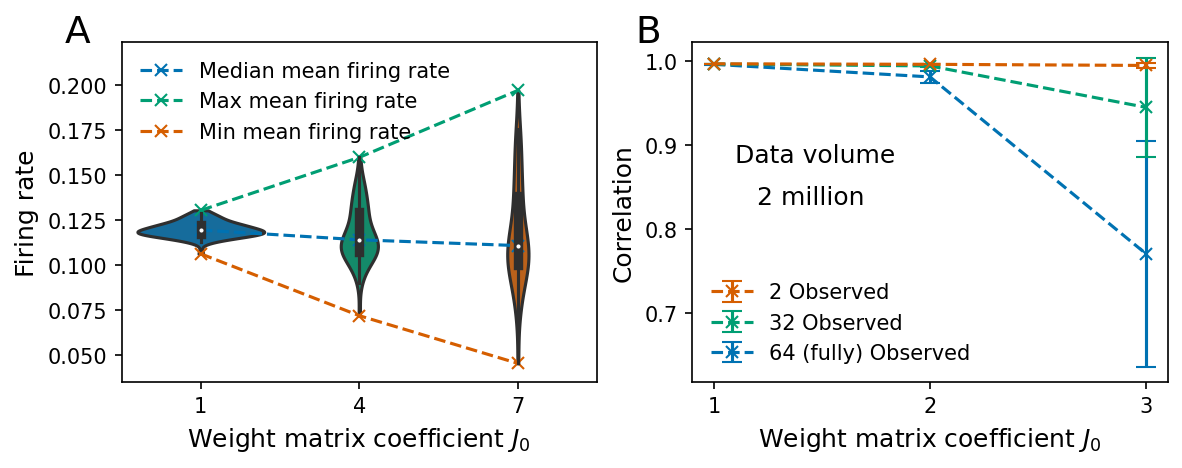

In [240]:
import seaborn as sns

# EI network
# mean firing rate
dt=0.1
firing_rates = []
median = []
max_firing = []
min_firing = []
mean = []
for j0 in ["", "_weight_4", "_weight_7"]:
    filename=f"spk_train_64_2000000_b_-2_-1_diag_EI_network{j0}"
    with open(os.path.join("/home/tong/hidden-neuron-simulation/data", filename), "rb") as f:
        spk_train = pickle.load(f)
    mean_firing_rate = spk_train.spike_train[1000000:,:].mean(0)/dt
#     print("median", np.median(mean_firing_rate))
#     plt.hist(mean_firing_rate,20)
    firing_rates.append(mean_firing_rate)
    median.append(np.median(mean_firing_rate))
    mean.append(np.mean(mean_firing_rate))
    max_firing.append(np.max(mean_firing_rate))
    min_firing.append(np.min(mean_firing_rate))



fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(9, 3), dpi=150, constrained_layout=False)
x= [0, 1, 2]
ax2.plot(x,median, "--x", label="Median mean firing rate")
# ax2.plot([1, 2, 3],mean, "--x")
ax2.plot(x,max_firing, "--x", label="Max mean firing rate")
ax2.plot(x,min_firing, "--x", label="Min mean firing rate")
sns.violinplot(data=firing_rates, scale='area', cut=0, ax=ax2)
ax2.set_xticks(x, [1, 4, 7])
handles, labels = ax2.get_legend_handles_labels()
order = [0,1,2]
ax2.legend([handles[idx] for idx in order],[labels[idx] for idx in order], frameon=False)
# plt.legend(frameon=False)
ax2.set_xlabel("Weight matrix coefficient $J_0$", fontsize=12)
ax2.set_ylabel("Firing rate", fontsize=12)
# ax2.set_ylabel("Correlation", fontsize=15)
# plt.text(2.1, 0.68, "Weight matrix", fontsize=12)
# plt.text(2.4, 0.63, "$J_0$=3", fontsize=12)
# filename="Correlation_data_volume.pdf"    
ax2.set_ylim((0.035,0.224))
ax2.text(-0.12, 1, 'A', transform=ax2.transAxes,
            size=18)  

corr_median = []
corr_std = []
for weight in ["", "_weight_4", "_weight_7"]:
    cov_path=f"/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_covariance_EI_network{weight}"
    filter_path=f"/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_EI_network{weight}"
    corr = {i: [] for i in [2, 4, 8, 16, 32, 48, 64]}

    for i in range(64):
        for obs in [2, 32, 64]:
            corr_dict = calculate_corr_all(N_i=i, N_j=i, obs=[2,32,64], cov_path=cov_path, filter_path=filter_path, dp=dp, total_data=2000000)

#             corr_dict = calculate_corr_all(N_i=i, N_j=i, cov_path=cov_path, filter_path=filter_path, dp=1, total_data=2000000)
            if obs in corr_dict:   
                corr[obs].append(corr_dict[obs])
    corr_median.append( {key: np.median(value) for key, value in corr.items()})
    corr_std.append( {key: np.std(value) for key, value in corr.items()})
    
for obs in [2, 32, 64][::-1]:
    if obs == 64:
        full = "(fully) "
    else:
        full = ""
    ax1.errorbar([1, 2, 3], [corr_[obs] for corr_ in corr_median], yerr=[corr_[obs] for corr_ in corr_std], fmt="--x", capsize=5, label=f"{obs} {full}Observed")
handles, labels = ax1.get_legend_handles_labels()
order = [2,1,0]
ax1.legend([handles[idx] for idx in order],[labels[idx] for idx in order], frameon=False)
ax1.set_xlabel("Weight matrix coefficient $J_0$", fontsize=12)
ax1.set_ylabel("Correlation", fontsize=12)
ax1.set_xticks([1, 2, 3], [1, 2, 3])
ax1.text(1.1, 0.88, "Data volume", fontsize=12)
ax1.text(1.2, 0.83, "2 million", fontsize=12)

ax1.text(-0.12, 1, 'B', transform=ax1.transAxes,
            size=18)


